| Model Group                   | Model Name                    | Link | Viable | Dependencies                                     | Input Requirements                             | Additional Preprocessing/Data Formats                                    | Data Type    | Complexity | Training Time |
|-------------------------------|-------------------------------|------|--------|--------------------------------------------------|------------------------------------------------|---------------------------------------------------|---------------|------------|---------------|
| Hybrid Models                 | Prophet                       | [Link](#) | Yes    | Python Native (Stan backend)                     | 2D shape (timestamp, data)                     | Dataframe with 'ds' (date) and 'y' (value) columns | Univariate   | Low        | Moderate      |
| Hybrid Models                 | Flow Forecast                 | [Link](#) | Yes    | PyTorch                                          | 3D shape (timestamp, data, features)           | Requires data normalization, handles missing values | Multivariate | Moderate   | High          |
| Hybrid Models                 | DeepTime                      | [Link](#) | Yes    | ?                                                | 3D shape (timestamp, data, features)           | Requires data normalization, handles missing values | Multivariate | High       | High          |
| Machine Learning Models       | XGBoost                       | [Link](#) | Yes    | Python Native                                    | 2D shape (data, features)                      | Requires numerical input, handles missing values   | Both         | Moderate   | Moderate      |
| Machine Learning Models       | LightGBM                      | [Link](#) | Yes    | Python Native                                    | 2D shape (data, features)                      | Requires numerical input, handles missing values   | Both         | Moderate   | Moderate      |
| Machine Learning Models       | AutoTS                        | [Link](#) | Yes    | ?                                                | 2D shape (timestamp, data)                     | Requires a univariate time series                  | Univariate   | Low        | Low           |
| Machine Learning Models       | PyCaret                       | [Link](#) | Yes    | Python Native (Multiple backend models)          | 2D shape (data, features)                      | Automatic preprocessing, handles categorical features and missing values | Both         | Low        | Low           |
| Neural Network Models         | LSTM                          | [Link](#) | Yes    | TensorFlow, Keras, PyTorch (depends on implementation) | 3D shape (timestamp, data, features)           | Requires data normalization, sequences of fixed length | Both         | High       | High          |
| Neural Network Models         | TCN                           | [Link](#) | Yes    | TensorFlow, Keras, PyTorch (depends on implementation) | 3D shape (timestamp, data, features)           | Requires data normalization, sequences of fixed length | Both         | High       | High          |
| Neural Network Models         | Temporal Fusion Transformer  | [Link](#) | Yes    | TensorFlow                                       | 3D shape (timestamp, data, features)           | Requires data normalization, handles missing values | Multivariate | High       | High          |
| Traditional Statistical Models| GARCH                         | [Link](#) | Yes    | Python Native (often via libraries like `arch`)  | 2D shape (timestamp, data)                     | Requires stationary data, handles missing values    | Univariate   | Low        | Low           |
| Traditional Statistical Models| Linear Regression             | [Link](#) | Yes    | Python Native (often via libraries like `scikit-learn`) | 2D shape (data, features)                      | Requires numerical input                             | Both         | Low        | Low           |
| Traditional Statistical Models| Auto-Arima                    | [Link](#) | Yes    | Python Native (often via libraries like `pmdarima`) | 2D shape (timestamp, data)                     | Requires stationary data                             | Univariate   | Moderate   | Moderate      |
| Traditional Statistical Models| Markov Chains                 | [Link](#) | Yes    | Python Native                                    | 2D shape (states, transition probabilities)    | Requires state transition matrix                    | Both         | Low        | Low           |


## <font color= blue >1. Importing the Necessary Libraries</font> <a class="anchor" id="second-bullet"></a>
--------------------------------------------------------------

In [1]:
#!pip install requests
#!pip install numpy
#!pip install pandas
#!pip install scipy
#!pip install seaborn
#!pip install matplotlib
#!pip install cryptocmd
#!pip install prettytable
#!pip install joblib
#!pip install scikit-learn
#!pip install lightgbm
#!pip install xgboost
#!pip install statsmodels
#!pip install pmdarima
#!pip install arch
#!pip install tensorflow
#!pip install keras-tuner
#!pip install bokeh
#!pip install solenium

In [2]:
# Standard library imports
import os
import time
import sys
import warnings
import logging
import pickle
from typing import Optional
from datetime import datetime, timedelta
from math import pi

# Third-party imports
import requests
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from cryptocmd import CmcScraper
from prettytable import PrettyTable
import joblib
from joblib import dump, load
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.tsatools import detrend
from pmdarima import auto_arima
from arch import arch_model
from pandas.tseries.holiday import USFederalHolidayCalendar
from scipy.signal import detrend
import xgboost as xgb
#from selenium import webdriver

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Deep Learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Dropout, LSTM, TimeDistributed, Conv1D, MaxPooling1D, Flatten,
                                    ConvLSTM2D, BatchNormalization, GRU)
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1, l2, l1_l2
from keras_tuner import HyperModel, RandomSearch
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, BatchNormalization
from keras.regularizers import l1, l2, l1_l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras_tuner.tuners import BayesianOptimization

# Plotting and Visualization
from bokeh.plotting import figure, show, output_notebook, save
from bokeh.models import (HoverTool, ColumnDataSource, WheelZoomTool, Span, Range1d,
                          FreehandDrawTool, MultiLine, NumeralTickFormatter, Button, CustomJS)
from bokeh.layouts import column, row
from bokeh.io import curdoc, export_png
from bokeh.models.widgets import CheckboxGroup
from bokeh.themes import Theme
from bokeh.io.export import get_screenshot_as_png
from IPython.core.display import display, HTML
import hashlib


# Other settings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.3f}'.format)
logging.basicConfig(level=logging.INFO, format='%(asctime)s [%(levelname)s] - %(message)s')
logger = logging.getLogger(__name__)
display(HTML("<style>.bk-root { margin-left: auto; margin-right: auto; }</style>"))


print("Hello Everyone")

C:\Users\migue\AppData\Local\Temp\ipykernel_14320\875911377.py:70: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Hello Everyone


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import numpy as np
import logging
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
import logging
from scipy.stats import jarque_bera, kstest
from statsmodels.tsa.stattools import kpss
#from scipy.stats import boxcox, invboxcox
import json
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from abc import ABC, abstractmethod
from tensorflow.keras.layers import LSTM, GRU, Conv1D
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Attention
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Input, Attention
from tensorflow.keras import Model

from tensorflow.keras.layers import Bidirectional, GRU, Dropout, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense, Attention, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Reshape, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, GlobalMaxPooling1D
from tensorflow.keras.models import Sequential

# ------------------------------------------------------------------------------------------------------------------------------------------
# Block - CryptoData

In [4]:
class CryptoData:
    """
    The CryptoData class is responsible for fetching and validating cryptocurrency data. 
    It provides methods to fetch raw data, validate its integrity, and format it for display.
    
    Attributes:
    - EXPECTED_COLUMNS: A set of expected columns in the fetched data.
    - crypto_symbol: The cryptocurrency symbol to fetch.
    - retries: The maximum number of data fetch retries.
    - backoff_factor: The exponential backoff factor for retries.
    """
    
    EXPECTED_COLUMNS = {'Date', 'Open', 'High', 'Low', 'Close', 'Market Cap', 'Volume'}

    def __init__(self, crypto_symbol: str, retries: int = 5, backoff_factor: float = 0.3):
        """Initializes the class with the given cryptocurrency symbol."""
        logger.info("Initializing CryptoData class.")
        self.crypto_symbol = crypto_symbol
        self.retries = retries
        self.backoff_factor = backoff_factor
        logger.info("CryptoData class initialized.")

    def _validate_data(self, df: pd.DataFrame) -> Optional[pd.DataFrame]:
        """Validates the integrity of the fetched data."""
        logger.info("Starting data validation.")
        if df.isnull().any().any():
            raise ValueError("The fetched data contains missing values.")
        if not self.EXPECTED_COLUMNS.issubset(df.columns):
            raise ValueError("Some expected columns are missing in the data.")
        for col in df.columns:
            if col != 'Date' and not pd.api.types.is_numeric_dtype(df[col]):
                raise ValueError(f"Column {col} is not of numeric type in the fetched data.")
        logger.info("Data validation completed.")
        return df

    def _fetch_cryptocmd_data(self) -> pd.DataFrame:
        """Fetches cryptocurrency data with retries and exponential backoff."""
        logger.info(f"Fetching data for {self.crypto_symbol}.")
        for retry in range(self.retries):
            try:
                scraper = CmcScraper(self.crypto_symbol)
                df = scraper.get_dataframe()
                return self._validate_data(df)
            except Exception as e:
                logger.error(f'An error occurred while fetching data: {e}')
                sleep_time = self.backoff_factor * (2 ** retry)
                time.sleep(sleep_time)
                logger.info(f'Retrying... (Attempt {retry + 1}/{self.retries})')
        else:
            raise Exception('Max retries reached. Could not fetch the data.')
        logger.info(f"Data fetched successfully for {self.crypto_symbol}.")

    def get_cryptocmd_data(self) -> pd.DataFrame:
        """Fetches and returns the cryptocurrency data."""
        logger.info(f"Getting {self.crypto_symbol} data.")
        df = self._fetch_cryptocmd_data()
        df.set_index('Date', inplace=True)
        df.index = pd.to_datetime(df.index)
        df = df.iloc[::-1]  # Reversing the DataFrame
        logger.info(f"Data obtained successfully for {self.crypto_symbol}.")
        return df.round(2)

    @staticmethod
    def _format_monetary_value(value: float) -> str:
        """Formats a monetary value to a string."""
        return "${:,.2f}".format(value)

    @staticmethod
    def _format_volume_value(value: float) -> str:
        """Formats a volume value to a string."""
        if value > 1e9:
            return "{:.2f}B".format(value/1e9)
        elif value > 1e6:
            return "{:.2f}M".format(value/1e6)
        else:
            return "{:,.2f}".format(value)

    def get_display_data(self) -> pd.DataFrame:
        """Fetches and formats the cryptocurrency data for display."""
        logger.info(f"Formatting display data for {self.crypto_symbol}.")
        display_df = self.get_cryptocmd_data().copy()
        monetary_columns = ['Open', 'High', 'Low', 'Close']
        display_df[monetary_columns] = display_df[monetary_columns].applymap(self._format_monetary_value)
        volume_like_columns = ['Volume', 'Market Cap']
        display_df[volume_like_columns] = display_df[volume_like_columns].applymap(self._format_volume_value)
        logger.info(f"Display data formatted successfully for {self.crypto_symbol}.")
        return display_df


In [5]:
# Initialize CryptoData class for different cryptocurrencies
crypto_symbols = ['BTC']
crypto_data_objects = {}

for symbol in crypto_symbols:
    crypto_data_objects[symbol] = CryptoData(symbol)

# Fetch and save data
data_c = {}
display_data = {}

for symbol, crypto_data_object in crypto_data_objects.items():
    data_c[symbol] = crypto_data_object.get_cryptocmd_data()
    display_data[symbol] = crypto_data_object.get_display_data()

# Now, data['BTC'], data['ETH'], etc. contain the data
# And display_data['BTC'], display_data['ETH'], etc. contain the display data


2023-10-01 14:09:29,487 [INFO] - Initializing CryptoData class.
2023-10-01 14:09:29,489 [INFO] - CryptoData class initialized.
2023-10-01 14:09:29,492 [INFO] - Getting BTC data.
2023-10-01 14:09:29,494 [INFO] - Fetching data for BTC.
2023-10-01 14:09:36,588 [INFO] - Starting data validation.
2023-10-01 14:09:36,596 [INFO] - Data validation completed.
2023-10-01 14:09:36,611 [INFO] - Data obtained successfully for BTC.
2023-10-01 14:09:36,619 [INFO] - Formatting display data for BTC.
2023-10-01 14:09:36,620 [INFO] - Getting BTC data.
2023-10-01 14:09:36,621 [INFO] - Fetching data for BTC.
2023-10-01 14:09:38,519 [INFO] - Starting data validation.
2023-10-01 14:09:38,525 [INFO] - Data validation completed.
2023-10-01 14:09:38,541 [INFO] - Data obtained successfully for BTC.
2023-10-01 14:09:38,596 [INFO] - Display data formatted successfully for BTC.


In [6]:
data = data_c['BTC'].copy()
data

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,136.690,143.370,110.850,127.950,25956.840,1419007893.660
2013-04-29,134.440,147.490,134.000,144.540,0.000,1603768864.500
2013-04-30,144.000,146.930,134.050,139.000,0.000,1542813125.000
2013-05-01,139.000,139.890,107.720,116.990,0.000,1298954593.750
2013-05-02,116.380,125.600,92.280,105.210,0.000,1168517495.250
...,...,...,...,...,...,...
2023-09-26,26294.760,26389.880,26090.710,26217.250,9985498161.060,511151155986.800
2023-09-27,26209.500,26817.840,26111.460,26352.720,11718380997.240,513818515485.060
2023-09-28,26355.810,27259.500,26327.320,27021.550,14079002707.330,526883682824.270


# ------------------------------------------------------------------------------------------------------------------------------------------
# Block - TimeSeriesAnalysis

In [7]:

logger = logging.getLogger(__name__)

class TimeSeriesAnalysis:
    """
    A class to perform various time series analysis tasks such as stationarity checks, volatility modeling, and decomposition.

    Attributes:
        data (pd.DataFrame): Time series data.
        target (str): Target column for time series analysis.
    """

    def __init__(self, data, target):
        """
        Initialize the TimeSeriesAnalysis class.

        Parameters:
            data (pd.DataFrame): Time series data.
            target (str): Target column for time series analysis.
        """
        logger.info("Initializing TimeSeriesAnalysis class")
        if target not in data.columns:
            raise ValueError(f"'{target}' is not a column in the provided data.")
        self.data = data
        self.target = target
        self.alpha = 0.05  

    def save_and_show_plot(self, fig, filename, show=True):
        """
        Utility method to save and display the plot.

        Parameters:
            fig (matplotlib.figure.Figure): The plot figure.
            filename (str): Filename to save the plot.
            show (bool, optional): Whether to display the plot. Default is True.
        """
        if not os.path.exists('ts_plots_assets'):
            os.makedirs('ts_plots_assets')
        path = os.path.join('ts_plots_assets', filename)
        fig.savefig(path)
        logger.info(f"Plot saved to: {path}")
        if show:
            plt.show()

    def check_stationarity(self):
        """
        Check the stationarity of the time series data using the Augmented Dickey-Fuller test.

        Returns:
            tuple: ADF Statistic, p-value, and critical values.
        """
        logger.info("Checking stationarity of the time series")
        result = adfuller(self.data[self.target])
        print('-'*60)
        print('ADF Statistic:', result[0])
        print('p-value:', result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print('\t{}: {}'.format(key, value))
        if result[1] <= 0.05:
            print('The series is likely stationary.')
        else:
            print('The series is likely non-stationary.')
        print('-'*60)
        print("\n")
        return result[0], result[1], result[4]

    def check_autocorrelation(self):
        """
        Check the autocorrelation of the time series using ACF and PACF plots.

        Returns:
            tuple: ACF and PACF figures.
        """
        logger.info("Checking autocorrelation of the time series")
        fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))
        plot_acf(self.data[self.target], lags=50, alpha=0.05, ax=ax1)
        ax1.set_title("ACF for {}".format(self.target))
        plot_pacf(self.data[self.target], lags=50, alpha=0.05, method='ols', ax=ax2)
        ax2.set_title("PACF for {}".format(self.target))
        self.save_and_show_plot(fig, 'autocorrelation.png')
        return fig

    def check_volatility(self, p=1, q=1):
        """
        Check volatility using GARCH model.

        Parameters:
            p (int, optional): The number of lag observations to include in the GARCH model. Default is 1.
            q (int, optional): The number of lag forecast errors to include in the GARCH model. Default is 1.

        Returns:
            str: Summary of the GARCH model fit.
        """
        logger.info("Checking volatility of the time series")
        try:
            model = arch_model(self.data[self.target], vol='Garch', p=p, q=q)
            model_fit = model.fit(disp='off')
            summary_str = model_fit.summary().as_text()
            print(summary_str)
            return summary_str
        except Exception as e:
            print(f"Error encountered: {e}")
            return f"Error encountered: {e}"

    def decompose_time_series(self, model='additive', period=30, show=True):
        """
        Decompose the time series data into trend, seasonal, and residual components.

        Parameters:
            model (str): The type of decomposition model ('additive' or 'multiplicative').
            period (int): The period for seasonal decomposition.
            show (bool): Whether to display the plot.
        Returns:
            fig (matplotlib.Figure): The figure object containing the decomposition plots.
        """
        logger.info("Decomposing the time series")
        result = seasonal_decompose(self.data[self.target], model=model, period=period)

        # Adjusting the figsize here
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

        result.observed.plot(ax=ax1)
        ax1.set_title('Observed')
        result.trend.plot(ax=ax2)
        ax2.set_title('Trend')
        result.seasonal.plot(ax=ax3)
        ax3.set_title('Seasonal')
        result.resid.plot(ax=ax4)
        ax4.set_title('Residual')

        self.save_and_show_plot(fig, 'decompose.png', show=show)

        return fig

    def test_granger_causality(self, other_column, maxlag=30, verbose=False):
        """Test Granger Causality between target and another time series column.
        
        Parameters:
            other_column (str): The name of the other column to test for Granger Causality.
            maxlag (int): The maximum number of lags to consider for the test.
            verbose (bool): Whether to display detailed output.
        
        Returns:
            dict: A dictionary containing the Granger Causality test results.
        """
        logger.info("Testing Granger causality")
        if other_column not in self.data.columns:
            raise ValueError(f"'{other_column}' is not a column in the provided data.")
        other_data = self.data[other_column].values
        target_data = self.data[self.target].values
        data = np.column_stack((target_data, other_data))
        result = grangercausalitytests(data, maxlag=maxlag, verbose=verbose)
        return result
    
    
    def concise_granger_output_table(self, granger_results):
        """Generate a concise report from the Granger Causality test results in a table format."""
        table_content = ['<table border="1" style="border-collapse:collapse;">']
        lags = list(granger_results.keys())
        for i in range(0, len(lags), 6):
            table_content.append('<tr>')
            for j in range(6):
                if i + j < len(lags):
                    lag = lags[i + j]
                    test_statistics = granger_results[lag][0]
                    cell_content = (f"<b>Lag: {lag}</b><br>"
                                    f"ssr_ftest: F={test_statistics['ssr_ftest'][0]:.4f}, p={test_statistics['ssr_ftest'][1]:.4f}<br>"
                                    f"ssr_chi2test: chi2={test_statistics['ssr_chi2test'][0]:.4f}, p={test_statistics['ssr_chi2test'][1]:.4f}<br>"
                                    f"lrtest: chi2={test_statistics['lrtest'][0]:.4f}, p={test_statistics['lrtest'][1]:.4f}<br>"
                                    f"params_ftest: F={test_statistics['params_ftest'][0]:.4f}, p={test_statistics['params_ftest'][1]:.4f}")
                    table_content.append(f'<td style="padding: 8px; text-align: left;">{cell_content}</td>')
            table_content.append('</tr>')
        table_content.append('</table>')
        return "\n".join(table_content)
    
    def check_jarque_bera(self, alpha=None):
        """
        Perform Jarque-Bera test to check for normality.

        Parameters:
            alpha (float, optional): Significance level. Defaults to class-level alpha.

        Returns:
            dict: Test results including test statistic, p-value, and conclusion.
        """
        alpha = alpha if alpha is not None else self.alpha
        logger.info("Performing Jarque-Bera test")
        jb_value, p_value = jarque_bera(self.data[self.target])
        conclusion = "Fail to reject the null hypothesis: The series likely follows a normal distribution." if p_value > alpha else "Reject the null hypothesis: The series likely does not follow a normal distribution."

        result = {
            'test_statistic': jb_value,
            'p_value': p_value,
            'alpha': alpha,
            'null_hypothesis': 'The series follows a normal distribution.',
            'conclusion': conclusion
        }

        output_str = (f"Jarque-Bera test statistic: {jb_value}\n"
                      f"p-value: {p_value}\n"
                      f"Significance level: {alpha}\n"
                      f"{conclusion}")

        print(output_str)
        print("\n")
        logger.info(output_str.replace("\n", " "))

        return result
    
    def check_kpss(self, alpha=None):
        """
        Perform KPSS test to check for stationarity.

        Parameters:
            alpha (float, optional): Significance level. Defaults to class-level alpha.

        Returns:
            dict: Test results including test statistic, p-value, critical values, and conclusion.
        """
        alpha = alpha if alpha is not None else self.alpha
        logger.info("Performing KPSS test")
        kpss_value, p_value, _, crit = kpss(self.data[self.target])
        conclusion = "Fail to reject the null hypothesis: The series is likely non-stationary." if p_value > alpha else "Reject the null hypothesis: The series is likely stationary."

        result = {
            'test_statistic': kpss_value,
            'p_value': p_value,
            'alpha': alpha,
            'critical_values': crit,
            'null_hypothesis': 'The series is stationary around a constant.',
            'conclusion': conclusion
        }

        output_str = (f"KPSS test statistic: {kpss_value}\n"
                      f"p-value: {p_value}\n"
                      f"Critical values: {crit}\n"
                      f"Significance level: {alpha}\n"
                      f"{conclusion}")

        print(output_str)
        print("\n")
        logger.info(output_str.replace("\n", " "))

        return result


    def check_ks_test(self, alpha=None, dist='norm'):
        """
        Perform Kolmogorov-Smirnov test for goodness of fit.

        Parameters:
            alpha (float, optional): Significance level. Defaults to class-level alpha.
            dist (str, optional): The distribution to test against. Defaults to 'norm'.

        Returns:
            dict: Test results including test statistic, p-value, and conclusion.
        """
        alpha = alpha if alpha is not None else self.alpha
        logger.info("Performing Kolmogorov-Smirnov test")
        ks_value, p_value = kstest(self.data[self.target], dist)
        conclusion = "Fail to reject the null hypothesis: The series likely follows the specified distribution." if p_value > alpha else "Reject the null hypothesis: The series likely does not follow the specified distribution."

        result = {
            'test_statistic': ks_value,
            'p_value': p_value,
            'alpha': alpha,
            'null_hypothesis': f'The series follows the {dist} distribution.',
            'conclusion': conclusion
        }

        output_str = (f"Kolmogorov-Smirnov test statistic: {ks_value}\n"
                      f"p-value: {p_value}\n"
                      f"Significance level: {alpha}\n"
                      f"{conclusion}")

        print(output_str)
        print("\n")
        logger.info(output_str.replace("\n", " "))

        return result


2023-10-01 14:09:38,771 [INFO] - Initializing TimeSeriesAnalysis class
2023-10-01 14:09:38,773 [INFO] - Checking autocorrelation of the time series
2023-10-01 14:09:39,761 [INFO] - Plot saved to: ts_plots_assets\autocorrelation.png


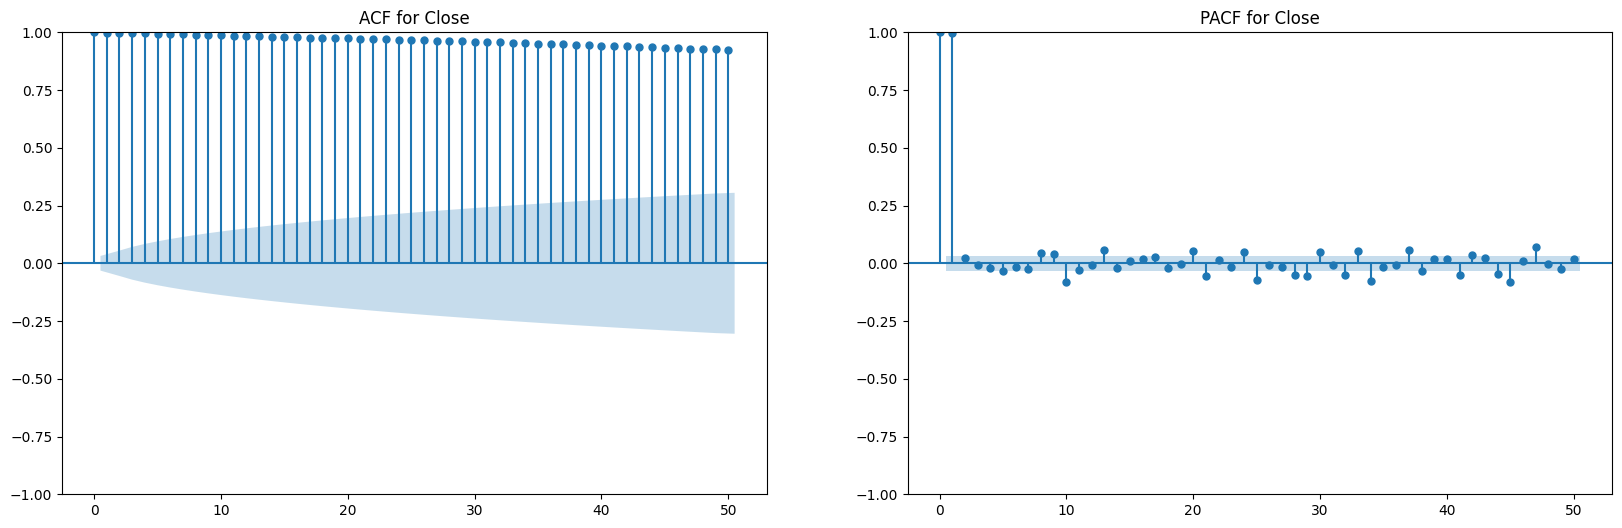

2023-10-01 14:09:40,123 [INFO] - Decomposing the time series
2023-10-01 14:09:41,578 [INFO] - Plot saved to: ts_plots_assets\decompose.png


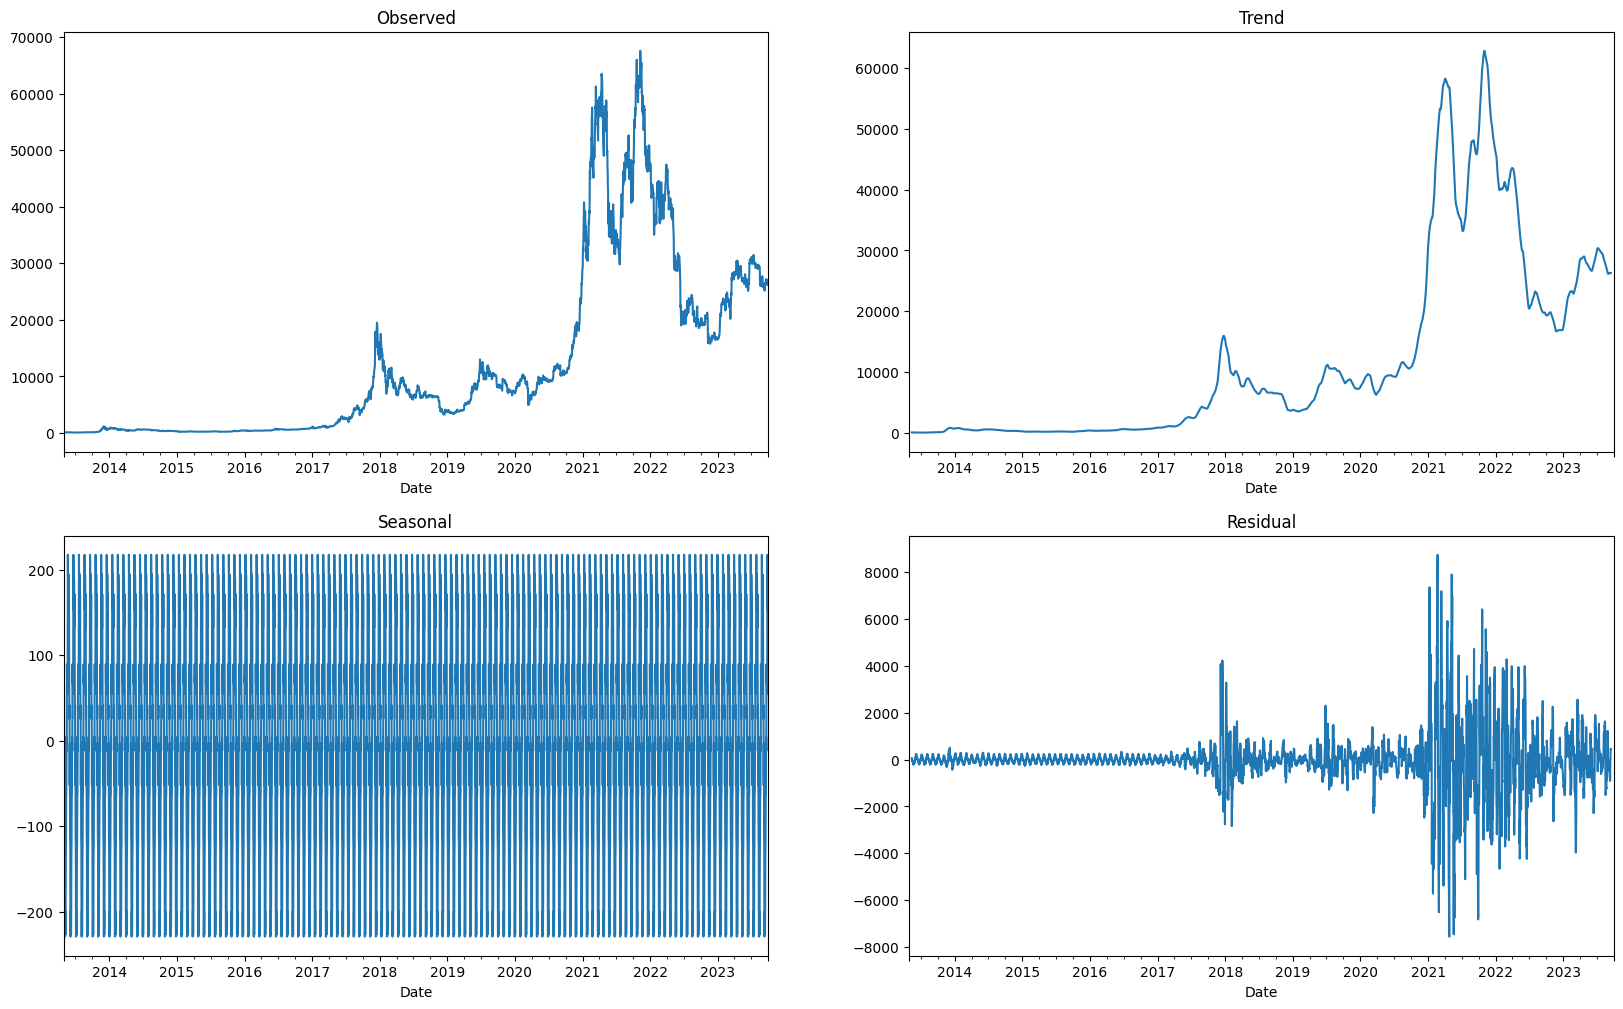

2023-10-01 14:09:42,922 [INFO] - Checking stationarity of the time series
2023-10-01 14:09:43,434 [INFO] - Performing Jarque-Bera test
2023-10-01 14:09:43,434 [INFO] - Jarque-Bera test statistic: 1714.395649605525 p-value: 0.0 Significance level: 0.05 Reject the null hypothesis: The series likely does not follow a normal distribution.
2023-10-01 14:09:43,434 [INFO] - Performing KPSS test
2023-10-01 14:09:43,434 [INFO] - KPSS test statistic: 6.097230471908285 p-value: 0.01 Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739} Significance level: 0.05 Reject the null hypothesis: The series is likely stationary.
2023-10-01 14:09:43,434 [INFO] - Performing Kolmogorov-Smirnov test
2023-10-01 14:09:43,451 [INFO] - Kolmogorov-Smirnov test statistic: 1.0 p-value: 0.0 Significance level: 0.05 Reject the null hypothesis: The series likely does not follow the specified distribution.
2023-10-01 14:09:43,453 [INFO] - Checking volatility of the time series
2023-10-01 14:09:43,552 

------------------------------------------------------------
ADF Statistic: -1.5965072659921256
p-value: 0.4853477685007043
Critical Values:
	1%: -3.43208206687579
	5%: -2.8623053317903717
	10%: -2.567177396377736
The series is likely non-stationary.
------------------------------------------------------------


Jarque-Bera test statistic: 1714.395649605525
p-value: 0.0
Significance level: 0.05
Reject the null hypothesis: The series likely does not follow a normal distribution.


KPSS test statistic: 6.097230471908285
p-value: 0.01
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Significance level: 0.05
Reject the null hypothesis: The series is likely stationary.


Kolmogorov-Smirnov test statistic: 1.0
p-value: 0.0
Significance level: 0.05
Reject the null hypothesis: The series likely does not follow the specified distribution.


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:   

"Lag: 1ssr_ftest: F=2.1635, p=0.1414ssr_chi2test: chi2=2.1652, p=0.1412lrtest: chi2=2.1646, p=0.1412params_ftest: F=2.1635, p=0.1414","Lag: 2ssr_ftest: F=0.1857, p=0.8305ssr_chi2test: chi2=0.3719, p=0.8303lrtest: chi2=0.3719, p=0.8303params_ftest: F=0.1857, p=0.8305","Lag: 3ssr_ftest: F=0.8734, p=0.4540ssr_chi2test: chi2=2.6251, p=0.4531lrtest: chi2=2.6242, p=0.4533params_ftest: F=0.8734, p=0.4540","Lag: 4ssr_ftest: F=1.6649, p=0.1553ssr_chi2test: chi2=6.6752, p=0.1541lrtest: chi2=6.6694, p=0.1544params_ftest: F=1.6649, p=0.1553","Lag: 5ssr_ftest: F=0.8052, p=0.5458ssr_chi2test: chi2=4.0376, p=0.5440lrtest: chi2=4.0354, p=0.5443params_ftest: F=0.8052, p=0.5458","Lag: 6ssr_ftest: F=1.0839, p=0.3694ssr_chi2test: chi2=6.5257, p=0.3669lrtest: chi2=6.5201, p=0.3675params_ftest: F=1.0839, p=0.3694"
"Lag: 7ssr_ftest: F=2.2593, p=0.0271ssr_chi2test: chi2=15.8776, p=0.0263lrtest: chi2=15.8445, p=0.0266params_ftest: F=2.2593, p=0.0271","Lag: 8ssr_ftest: F=1.6940, p=0.0946ssr_chi2test: chi2=13.6129, p=0.0924lrtest: chi2=13.5885, p=0.0931params_ftest: F=1.6940, p=0.0946","Lag: 9ssr_ftest: F=4.9507, p=0.0000ssr_chi2test: chi2=44.7803, p=0.0000lrtest: chi2=44.5185, p=0.0000params_ftest: F=4.9507, p=0.0000","Lag: 10ssr_ftest: F=2.2741, p=0.0119ssr_chi2test: chi2=22.8672, p=0.0112lrtest: chi2=22.7986, p=0.0115params_ftest: F=2.2741, p=0.0119","Lag: 11ssr_ftest: F=2.2772, p=0.0091ssr_chi2test: chi2=25.2013, p=0.0085lrtest: chi2=25.1181, p=0.0088params_ftest: F=2.2772, p=0.0091","Lag: 12ssr_ftest: F=3.8047, p=0.0000ssr_chi2test: chi2=45.9596, p=0.0000lrtest: chi2=45.6836, p=0.0000params_ftest: F=3.8047, p=0.0000"
"Lag: 13ssr_ftest: F=2.8828, p=0.0004ssr_chi2test: chi2=37.7448, p=0.0003lrtest: chi2=37.5583, p=0.0003params_ftest: F=2.8828, p=0.0004","Lag: 14ssr_ftest: F=4.6411, p=0.0000ssr_chi2test: chi2=65.4764, p=0.0000lrtest: chi2=64.9179, p=0.0000params_ftest: F=4.6411, p=0.0000","Lag: 15ssr_ftest: F=4.6446, p=0.0000ssr_chi2test: chi2=70.2428, p=0.0000lrtest: chi2=69.6003, p=0.0000params_ftest: F=4.6446, p=0.0000","Lag: 16ssr_ftest: F=4.7990, p=0.0000ssr_chi2test: chi2=77.4588, p=0.0000lrtest: chi2=76.6783, p=0.0000params_ftest: F=4.7990, p=0.0000","Lag: 17ssr_ftest: F=4.4660, p=0.0000ssr_chi2test: chi2=76.6297, p=0.0000lrtest: chi2=75.8655, p=0.0000params_ftest: F=4.4660, p=0.0000","Lag: 18ssr_ftest: F=4.1731, p=0.0000ssr_chi2test: chi2=75.8558, p=0.0000lrtest: chi2=75.1067, p=0.0000params_ftest: F=4.1731, p=0.0000"
"Lag: 19ssr_ftest: F=4.6636, p=0.0000ssr_chi2test: chi2=89.5290, p=0.0000lrtest: chi2=88.4877, p=0.0000params_ftest: F=4.6636, p=0.0000","Lag: 20ssr_ftest: F=4.4286, p=0.0000ssr_chi2test: chi2=89.5417, p=0.0000lrtest: chi2=88.4998, p=0.0000params_ftest: F=4.4286, p=0.0000","Lag: 21ssr_ftest: F=3.7422, p=0.0000ssr_chi2test: chi2=79.4898, p=0.0000lrtest: chi2=78.6670, p=0.0000params_ftest: F=3.7422, p=0.0000","Lag: 22ssr_ftest: F=3.8160, p=0.0000ssr_chi2test: chi2=84.9624, p=0.0000lrtest: chi2=84.0231, p=0.0000params_ftest: F=3.8160, p=0.0000","Lag: 23ssr_ftest: F=4.1194, p=0.0000ssr_chi2test: chi2=95.9386, p=0.0000lrtest: chi2=94.7429, p=0.0000params_ftest: F=4.1194, p=0.0000","Lag: 24ssr_ftest: F=4.3051, p=0.0000ssr_chi2test: chi2=104.6772, p=0.0000lrtest: chi2=103.2556, p=0.0000params_ftest: F=4.3051, p=0.0000"
"Lag: 25ssr_ftest: F=3.3890, p=0.0000ssr_chi2test: chi2=85.8825, p=0.0000lrtest: chi2=84.9221, p=0.0000params_ftest: F=3.3890, p=0.0000","Lag: 26ssr_ftest: F=3.4149, p=0.0000ssr_chi2test: chi2=90.0495, p=0.0000lrtest: chi2=88.9942, p=0.0000params_ftest: F=3.4149, p=0.0000","Lag: 27ssr_ftest: F=3.7146, p=0.0000ssr_chi2test: chi2=101.7749, p=0.0000lrtest: chi2=100.4293, p=0.0000params_ftest: F=3.7146, p=0.0000","Lag: 28ssr_ftest: F=3.8035, p=0.0000ssr_chi2test: chi2=108.1280, p=0.0000lrtest: chi2=106.6103, p=0.0000params_ftest: F=3.8035, p=0.0000","Lag: 29ssr_ftest: F=4.1161, p=0.0000ssr_chi2test: chi2=121.2603, p=0.0000lrtest: chi2=119.3554, p=0.0000params_ftest: F=4.1161, p=0.0000","Lag: 30ssr_ftest: F=3.8566, p=0.0000ssr

In [8]:
from IPython.core.display import display, HTML

# Instantiate and call methods
tsa = TimeSeriesAnalysis(data, target='Close')

# Store and display the results
autocorr_fig = tsa.check_autocorrelation()
decomposition = tsa.decompose_time_series(show=True)  # Set show=False if you don't want to display the plot

adf_stat, p_value, crit_values = tsa.check_stationarity()
jb_results = tsa.check_jarque_bera(alpha=0.05)
kpss_results = tsa.check_kpss(alpha=0.05)
ks_results = tsa.check_ks_test(alpha=0.05)
volatility_summary = tsa.check_volatility()
granger_results = tsa.test_granger_causality('Open', maxlag=30, verbose=False)
display(HTML(tsa.concise_granger_output_table(granger_results)))


In [9]:
    def recheck_statistical_properties(self, tsa):
        """
        Re-run statistical tests to confirm transformation effectiveness.
        
        Parameters:
            tsa (TimeSeriesAnalysis): TimeSeriesAnalysis object for running statistical tests.
        """
        self.logger.info("Rechecking statistical properties after transformations...")
        jb_results = tsa.check_jarque_bera(alpha=0.05)
        kpss_results = tsa.check_kpss(alpha=0.05)
        ks_results = tsa.check_ks_test(alpha=0.05)
        return jb_results, kpss_results, ks_results




# ------------------------------------------------------------------------------------------------------------------------------------------
# Block - UnifiedDataPreprocessor

In [10]:
class UnifiedDataPreprocessor:
    """ 
    UnifiedDataPreprocessor is responsible for preprocessing time series data.
    It performs actions like data splitting, normalization, reshaping, and sequence generation.
    
    Attributes:
        data (pd.DataFrame): Original time series data.
        target_column (str): Target column for preprocessing.
        logger (logging.Logger): Logger for tracking operations and debugging.
        transformations (list): List of applied transformations.
    """
    
    def __init__(self, df, target_column, logger=None):
        self.data = df.copy()
        self.target_column = target_column
        self.scalers = {}
        self.X_train, self.X_test, self.y_train, self.y_test = None, None, None, None
        self.X_train_seq, self.X_test_seq, self.y_train_seq, self.y_test_seq = None, None, None, None
        self.logger = logger if logger else logging.getLogger(__name__)
        self.transformations = []
        self.lambda_val = None  
        self.scalers = {
            "MinMax": MinMaxScaler(),
            "Standard": StandardScaler(),
            "Robust": RobustScaler(),
            "Quantile": QuantileTransformer(output_distribution='normal'),
            "Power": PowerTransformer(method='yeo-johnson')
        }
        self.logger.info("Initializing DataPreprocessor...")        
    
    def get_scaler(self, scaler_type):
        self.logger.info(f"Getting scaler of type: {scaler_type}")
        try:
            return self.scalers[scaler_type]
        except KeyError:
            raise ValueError(f"Invalid scaler_type. Supported types are: {', '.join(self.scalers.keys())}")

    def split_and_plot_data(self, test_size=0.2, split_date=None, plot=True):
        """
        Split the data into training and test sets, and then plot the target variable for both sets.
        :param test_size: float, optional, default 0.2. Represents the proportion of the dataset to include in the test split.
        :param split_date: str, optional, default None. A date string (e.g., '2023-01-01') to split data at a specific date. If provided, this will override test_size.
        """
        self.logger.info("Splitting data...")

        features = self.data.drop(columns=[self.target_column])
        target = self.data[self.target_column]

        if split_date:
            train_mask = self.data.index < split_date
            self.X_train, self.X_test = features[train_mask], features[~train_mask]
            self.y_train, self.y_test = target[train_mask], target[~train_mask]
        else:
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
                features, target, test_size=test_size, shuffle=False
            )

        self.logger.info(f"Data split completed. X_train shape: {self.X_train.shape}, y_train shape: {self.y_train.shape}")
        print(f"X_train shape: {self.X_train.shape}, y_train shape: {self.y_train.shape}")
        print(f"X_test shape: {self.X_test.shape}, y_test shape: {self.y_test.shape}")

        if plot: # Plotting
            plt.figure(figsize=(20, 7))
            plt.subplot(1, 2, 1)
            plt.title('Training Data - Target')
            plt.plot(self.y_train, label=self.target_column)
            plt.xlabel("Time")
            plt.ylabel("Value")
            plt.legend()
            plt.subplot(1, 2, 2)
            plt.title('Test Data - Target')
            plt.plot(self.y_test, label=self.target_column)
            plt.xlabel("Time")
            plt.ylabel("Value")
            plt.legend()
            plt.show()

    def normalize_data(self, scaler_type='MinMax',plot=True):
        self.logger.info("Normalizing feature data...")
        scaler = self.get_scaler(scaler_type)
        self.X_train = scaler.fit_transform(self.X_train)
        self.X_test = scaler.transform(self.X_test)
        self.scalers['features'] = scaler
        self.logger.info("Feature data normalization completed.")

        # Plot normalized training and test features
        if plot:
            plt.figure(figsize=(20, 8))
            plt.subplot(1, 2, 1)
            plt.title('Normalized Training Features')
            for i in range(self.X_train.shape[1]):
                plt.plot(self.X_train[:, i], label=f'Feature {i}')
            plt.legend()
            plt.subplot(1, 2, 2)
            plt.title('Normalized Test Features')
            for i in range(self.X_test.shape[1]):
                plt.plot(self.X_test[:, i], label=f'Feature {i}')
            plt.legend()
            plt.show()

    def normalize_target(self, scaler_type='MinMax', plot=True):
        self.logger.info("Normalizing target data...")
        scaler = self.get_scaler(scaler_type)
        self.y_train = scaler.fit_transform(self.y_train.values.reshape(-1, 1))
        self.y_test = scaler.transform(self.y_test.values.reshape(-1, 1))
        self.scalers['target'] = scaler
        self.logger.info("Target data normalization completed.")

        if plot:# Plot normalized training and test targets
            plt.figure(figsize=(20, 7))
            plt.subplot(1, 2, 1)
            plt.title('Normalized Training Target')
            plt.plot(self.y_train, label='Normalized ' + self.target_column)
            plt.legend()
            plt.subplot(1, 2, 2)
            plt.title('Normalized Test Target')
            plt.plot(self.y_test, label='Normalized ' + self.target_column)
            plt.legend()
            plt.show()
  
    def difference_and_plot_data(self, interval=1,plot=True):
        """
        Apply differencing to the data and then plot it.

        Parameters:
            interval (int): The interval between differencing. Default is 1.
        """
        self.logger.info(f"Applying differencing with interval {interval}...")
        self.data = self.data.diff(periods=interval).dropna()
        self.transformations.append('Differencing')
        self.logger.info("Differencing applied.")
        if plot:
            plt.figure(figsize=(20, 7))
            plt.title('Data after Differencing')
            plt.plot(self.data[self.target_column], label=self.target_column)
            plt.legend()
            plt.show()
        
    def box_cox_transform_and_plot(self, lambda_val=None,plot=True):
        if self.y_train is None or self.y_test is None:
            self.logger.warning("Data not split yet. Run split_data first.")
            return self  # Allow method chaining

        if np.any(self.y_train <= 0) or np.any(self.y_test <= 0):
            self.logger.warning("Data must be positive for Box-Cox transformation.")
            return self  # Allow method chaining

        self.logger.info("Applying Box-Cox transformation...")
        self.y_train = self.y_train.ravel()
        self.y_test = self.y_test.ravel()
        self.y_train, fitted_lambda = boxcox(self.y_train)
        self.lambda_val = fitted_lambda if lambda_val is None else lambda_val
        self.y_test = boxcox(self.y_test, lmbda=self.lambda_val)
        self.logger.info(f"Box-Cox transformation applied with lambda {self.lambda_val}.")

        if plot:# Plotting only the target variable
            plt.figure(figsize=(20, 7))
            plt.subplot(1, 2, 1)
            plt.title('Box-Cox Transformed Training Target')
            plt.plot(self.y_train, label='Transformed ' + self.target_column)
            plt.legend()
            plt.subplot(1, 2, 2)
            plt.title('Box-Cox Transformed Test Target')
            plt.plot(self.y_test, label='Transformed ' + self.target_column)
            plt.legend()
            plt.show()

    def inverse_box_cox_and_plot(self,plot=True):
        if f'Box-Cox on {self.target_column}' not in self.transformations:
            self.logger.warning("No Box-Cox transformation found on the target column. Skipping inverse transformation.")
            return

        self.logger.info("Applying inverse Box-Cox transformation...")
        self.y_train = invboxcox(self.y_train, self.lambda_val)
        self.y_test = invboxcox(self.y_test, self.lambda_val)
        self.transformations.remove(f'Box-Cox on {self.target_column}')
        self.logger.info(f"Inverse Box-Cox transformation applied on column {self.target_column}.")
        
        if plot:
            plt.figure(figsize=(20, 7))
            plt.subplot(1, 2, 1)
            plt.title('Inverse Box-Cox Transformed Training Target')
            plt.plot(self.y_train, label='Inverse Transformed ' + self.target_column)
            plt.legend()
            plt.subplot(1, 2, 2)
            plt.title('Inverse Box-Cox Transformed Test Target')
            plt.plot(self.y_test, label='Inverse Transformed ' + self.target_column)
            plt.legend()
            plt.show()
        
        
        
        
        
        
        
        
        
        
        
        
        
        
    def reshape_for_recurrent(self, data):
        self.logger.info("Reshaping data for recurrent models...")
        reshaped_data = data.reshape(data.shape)
        self.logger.info(f"Data reshaped to {reshaped_data.shape}.")
        return reshaped_data

    def generate_sequences(self, X_data, y_data, n_steps, seq_to_seq=False):
        X, y = [], []
        for i in range(len(X_data) - n_steps):
            seq_x = X_data[i:i + n_steps, :]
            if seq_to_seq:
                seq_y = y_data[i:i + n_steps, :]
            else:
                seq_y = y_data[i + n_steps - 1]
            X.append(seq_x)
            y.append(seq_y)
        self.logger.info(f"Generated {len(X)} sequences of shape {X[0].shape}.")
        return np.array(X), np.array(y)
    
    def prepare_data_for_recurrent(self, n_steps, seq_to_seq=False):
        self.logger.info(f"Preparing data for recurrent models with {n_steps} timesteps...")
        X_train_seq, y_train_seq = self.generate_sequences(self.X_train, self.y_train, n_steps, seq_to_seq)
        X_test_seq, y_test_seq = self.generate_sequences(self.X_test, self.y_test, n_steps, seq_to_seq)

        # Update instance variables here
        self.X_train_seq = self.reshape_for_recurrent(X_train_seq)
        self.X_test_seq = self.reshape_for_recurrent(X_test_seq)
        self.y_train_seq = y_train_seq  # Assuming y_train_seq and y_test_seq are already 2D
        self.y_test_seq = y_test_seq

        self.logger.info("Data preparation for recurrent models completed.")
        return self.X_train_seq, self.y_train_seq, self.X_test_seq, self.y_test_seq

    def prepare_for_prophet(self):
        """Prepare data for Prophet model."""
        prophet_data = self.data[[self.target_column]].reset_index()
        prophet_data.columns = ['ds', 'y']
        return prophet_data

    def get_preprocessed_data(self):
        """Get preprocessed data."""
        return self.X_train, self.y_train, self.X_test, self.y_test


In [11]:
df = data_c['BTC'].copy()

2023-10-01 14:09:45,632 [INFO] - Initializing TimeSeriesAnalysis class
2023-10-01 14:09:45,635 [INFO] - Initializing DataPreprocessor...
2023-10-01 14:09:45,637 [INFO] - Splitting data...
2023-10-01 14:09:45,648 [INFO] - Data split completed. X_train shape: (3046, 5), y_train shape: (3046,)


X_train shape: (3046, 5), y_train shape: (3046,)
X_test shape: (762, 5), y_test shape: (762,)


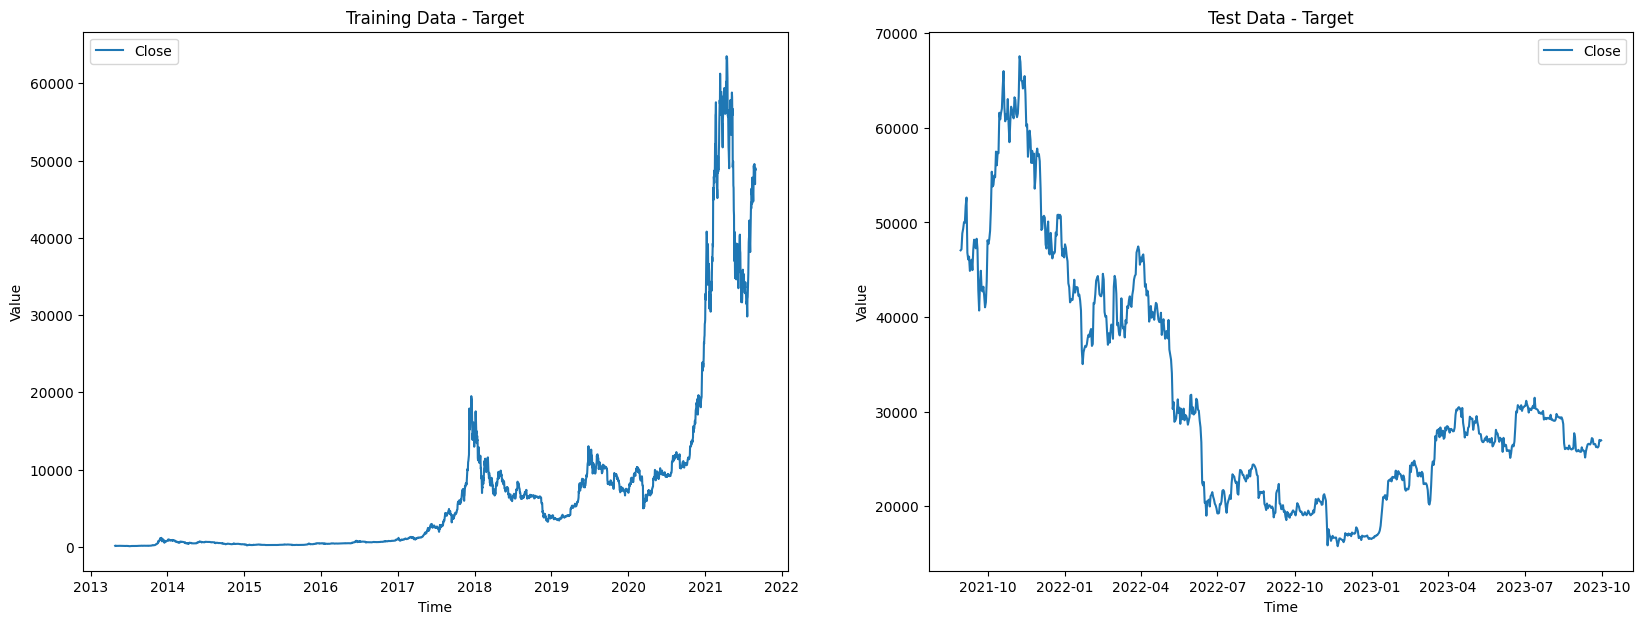

2023-10-01 14:09:46,414 [INFO] - Normalizing feature data...
2023-10-01 14:09:46,414 [INFO] - Getting scaler of type: MinMax
2023-10-01 14:09:46,429 [INFO] - Feature data normalization completed.
2023-10-01 14:09:46,429 [INFO] - Normalizing target data...
2023-10-01 14:09:46,429 [INFO] - Getting scaler of type: MinMax
2023-10-01 14:09:46,446 [INFO] - Target data normalization completed.
2023-10-01 14:09:46,449 [INFO] - Preparing data for recurrent models with 10 timesteps...
2023-10-01 14:09:46,460 [INFO] - Generated 3036 sequences of shape (10, 5).
2023-10-01 14:09:46,479 [INFO] - Generated 752 sequences of shape (10, 5).
2023-10-01 14:09:46,483 [INFO] - Reshaping data for recurrent models...
2023-10-01 14:09:46,485 [INFO] - Data reshaped to (3036, 10, 5).
2023-10-01 14:09:46,487 [INFO] - Reshaping data for recurrent models...
2023-10-01 14:09:46,490 [INFO] - Data reshaped to (752, 10, 5).
2023-10-01 14:09:46,492 [INFO] - Data preparation for recurrent models completed.
2023-10-01 14:

X_train shape: (3046, 5), y_train shape: (3046,)
X_test shape: (762, 5), y_test shape: (762,)
X_train shape: (3046, 5), y_train shape: (3046,)
X_test shape: (762, 5), y_test shape: (762,)
X_train shape: (3046, 5), y_train shape: (3046,)
X_test shape: (762, 5), y_test shape: (762,)


In [12]:
# LSTM Sequece-to-One
tsa = TimeSeriesAnalysis(df, target='Close')
d_preprocessor = UnifiedDataPreprocessor(df, target_column='Close')
d_preprocessor.split_and_plot_data(test_size=0.2)
d_preprocessor.normalize_data(scaler_type='MinMax',plot=False)
d_preprocessor.normalize_target(scaler_type='MinMax',plot=False)
n_steps = 10 
X_train_seq, y_train_seq, X_test_seq, y_test_seq = d_preprocessor.prepare_data_for_recurrent(n_steps, seq_to_seq=False)

# LSTM Sequece-to-Sequence
d_preprocessor = UnifiedDataPreprocessor(df, target_column='Close')
d_preprocessor.split_and_plot_data(test_size=0.2, plot=False)
d_preprocessor.normalize_data(scaler_type='MinMax', plot=False)
d_preprocessor.normalize_target(scaler_type='MinMax', plot=False)
n_steps = 10 
X_train_seq1, y_train_seq1, X_test_seq1, y_test_seq1 = d_preprocessor.prepare_data_for_recurrent(n_steps, seq_to_seq=True)

# For Linear Regression
d_preprocessor = UnifiedDataPreprocessor(df, target_column='Close')
d_preprocessor.split_and_plot_data(test_size=0.2, plot=False)
d_preprocessor.normalize_data(scaler_type='MinMax', plot=False)
d_preprocessor.normalize_target(scaler_type='MinMax', plot=False)
X_train_lr, y_train_lr, X_test_lr, y_test_lr = d_preprocessor.get_preprocessed_data()

# For XGBoost 
d_preprocessor = UnifiedDataPreprocessor(df, target_column='Close')
d_preprocessor.split_and_plot_data(test_size=0.2, plot=False)
d_preprocessor.normalize_data(scaler_type='MinMax', plot=False)
d_preprocessor.normalize_target(scaler_type='MinMax', plot=False)
X_train_xgb, y_train_xgb, X_test_xgb, y_test_xgb = d_preprocessor.get_preprocessed_data()

In [13]:
print("LSTM Sequence-to-One Data Shapes:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)
print("----")

print("LSTM Sequence-to-Sequence Data Shapes:")
print("X_train_seq:", X_train_seq1.shape)
print("y_train_seq:", y_train_seq1.shape)
print("X_test_seq:", X_test_seq1.shape)
print("y_test_seq:", y_test_seq1.shape)
print("----")

print("LR Data Shapes:")
print("X_train_lr:", X_train_lr.shape)
print("y_train_lr:", y_train_lr.shape)
print("X_test_lr:", X_test_lr.shape)
print("y_test_lr:", y_test_lr.shape)
print("----")


print("XGB Data Shapes:")
print("X_train_xgb:", X_train_xgb.shape)
print("y_train_xgb:", y_train_xgb.shape)
print("X_test_xgb:", X_test_xgb.shape)
print("y_test_xgb:", y_test_xgb.shape)
print("----")

LSTM Sequence-to-One Data Shapes:
X_train_seq: (3036, 10, 5)
y_train_seq: (3036, 1)
X_test_seq: (752, 10, 5)
y_test_seq: (752, 1)
----
LSTM Sequence-to-Sequence Data Shapes:
X_train_seq: (3036, 10, 5)
y_train_seq: (3036, 10, 1)
X_test_seq: (752, 10, 5)
y_test_seq: (752, 10, 1)
----
LR Data Shapes:
X_train_lr: (3046, 5)
y_train_lr: (3046, 1)
X_test_lr: (762, 5)
y_test_lr: (762, 1)
----
XGB Data Shapes:
X_train_xgb: (3046, 5)
y_train_xgb: (3046, 1)
X_test_xgb: (762, 5)
y_test_xgb: (762, 1)
----


# ------------------------------------------------------------------------------------------------------------------------------------------
# Block - BaseModel


## - Linear Regression
## - XGBoost
## - LightGBM
## - SVM
## - SVR
## - KNN
## - Random Forest
## - Extra Trees Regressor

In [14]:

class BaseModel:
    """
    A base class for machine learning models.
    This class handles data preprocessing, model training, predictions, and evaluations.
    
    - Linear Regression
    - XGBoost
    - LightGBM
    - KNN
    - SVM
    - Random Forest
    """
    def __init__(self, data_preprocessor, config, plot=True):
        self._validate_input(data_preprocessor.X_train, data_preprocessor.y_train, data_preprocessor.X_test, data_preprocessor.y_test)
        self.X_train = data_preprocessor.X_train
        self.y_train = data_preprocessor.y_train
        self.X_test = data_preprocessor.X_test
        self.y_test = data_preprocessor.y_test
        self.feature_scaler = data_preprocessor.scalers['features']
        self.target_scaler = data_preprocessor.scalers['target']
        self.data = data_preprocessor.data
        self.config = config
        self.plot = plot
        self.logger = logging.getLogger(__name__)    
    
    def _validate_input(self, X_train, y_train, X_test, y_test):
        """Validate the shape and type of training and testing data."""
        for arr, name in [(X_train, 'X_train'), (y_train, 'y_train'), (X_test, 'X_test'), (y_test, 'y_test')]:
            if not isinstance(arr, np.ndarray) or len(arr.shape) != 2:
                raise ValueError(f"{name} should be a 2D numpy array.")
                
    def inverse_scale_predictions(self):
        """ Inverse and unscale the predicstion back to their original shape"""
        try:
            self.train_predictions = self.target_scaler.inverse_transform(self.train_predictions.reshape(-1, 1)).flatten()
            self.test_predictions = self.target_scaler.inverse_transform(self.test_predictions.reshape(-1, 1)).flatten()
            self.logger.info("Predictions inverse transformed to original scale")
        except Exception as e:
            self.logger.error(f"Error occurred while inverse transforming predictions: {str(e)}")
            
    def compare_predictions(self):
        """Create dataframes comparing the original and predicted values for both training and test sets."""
        try:
            train_indices = self.data['Close'].iloc[:len(self.y_train)].values
            test_indices = self.data['Close'].iloc[-len(self.y_test):].values

            train_comparison_df = pd.DataFrame({'Original': train_indices, 'Predicted': self.train_predictions.ravel()})
            test_comparison_df = pd.DataFrame({'Original': test_indices, 'Predicted': self.test_predictions.ravel()})

            train_date_index = self.data.index[:len(self.y_train)]
            test_date_index = self.data.index[-len(self.y_test):]

            train_comparison_df.set_index(train_date_index, inplace=True)
            test_comparison_df.set_index(test_date_index, inplace=True)
            self.logger.info("Comparison dataframes generated")
            return train_comparison_df, test_comparison_df
        except Exception as e:
            self.logger.error(f"Error occurred while creating comparison dataframes: {str(e)}")

    def evaluate_model(self):
        """Evaluate the model using various metrics for both training and test sets."""
        try:
            train_comparison_df, test_comparison_df = self.compare_predictions()
            metrics = {
                'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
                'R2 Score': r2_score,
                'MAE': mean_absolute_error,
                'Explained Variance': explained_variance_score
            }

            results = []
            for dataset, comparison_df in [('Train', train_comparison_df), ('Test', test_comparison_df)]:
                dataset_results = {metric_name: metric_func(comparison_df['Original'], comparison_df['Predicted']) for metric_name, metric_func in metrics.items()}
                results.append(dataset_results)

            results_df = pd.DataFrame(results, index=['Train', 'Test'])
            return results_df
        except Exception as e:
            self.logger.error(f"Error occurred while evaluating the model: {str(e)}")
        
    @staticmethod
    def update_config_hash_mapping(config_hash, config, folder_name="models_assets"):
        mapping_file_path = os.path.join(folder_name, 'config_hash_mapping.json')
        if os.path.exists(mapping_file_path):
            with open(mapping_file_path, 'r') as f:
                existing_mappings = json.load(f)
        else:
            existing_mappings = {}

        existing_mappings[config_hash] = config

        # Save updated mappings
        with open(mapping_file_path, 'w') as f:
            json.dump(existing_mappings, f, indent=4)

    def save_model_to_folder(self, version, folder_name="models_assets"):
        model_name = self.__class__.__name__[9:]  # Remove 'Enhanced_' from the class name
        config_str = json.dumps(self.config, sort_keys=True)
        config_hash = hashlib.md5(config_str.encode()).hexdigest()[:6]

        if not os.path.exists(folder_name):
            os.makedirs(folder_name)

        BaseModel.update_config_hash_mapping(config_hash, self.config, folder_name)

        # Save the model
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f"{model_name}_V{version}_{config_hash}_{timestamp}.joblib"
        full_path = os.path.join(folder_name, filename)
        dump(self.model, full_path)
        self.logger.info(f"Model saved to {full_path}")
        
    def plot_predictions(self):
        """Plot the original vs predicted values for both training and testing data."""
        if not self.plot:
            return

        train_comparison_df, test_comparison_df = self.compare_predictions()
        train_comparison_df.index = pd.to_datetime(train_comparison_df.index)
        test_comparison_df.index = pd.to_datetime(test_comparison_df.index)

        # Initialize Bokeh figures
        p1 = figure(width=700, height=600, x_axis_type="datetime", title="Training Data: Actual vs Predicted")
        p1.line(train_comparison_df.index, train_comparison_df['Original'], legend_label="Actual", line_alpha=0.6)
        p1.line(train_comparison_df.index, train_comparison_df['Predicted'], legend_label="Predicted", line_color="red", line_dash="dashed")
        p1.legend.location = "top_left"

        p2 = figure(width=700, height=600, x_axis_type="datetime", title="Testing Data: Actual vs Predicted")
        p2.line(test_comparison_df.index, test_comparison_df['Original'], legend_label="Actual", line_alpha=0.6)
        p2.line(test_comparison_df.index, test_comparison_df['Predicted'], legend_label="Predicted", line_color="red", line_dash="dashed")
        p2.legend.location = "top_left"

        # Show plots
        show(row(p1, p2))


In [15]:
class Enhanced_Linear_Regression(BaseModel):
    """
    Initialize the Enhanced_Linear_Regression model.
    Supports Ridge and Lasso regularization.
    """
    def __init__(self, data_preprocessor, config, plot=True):
        super().__init__(data_preprocessor, config, plot)
        self._initialize_model()

    def _initialize_model(self):
        """Choose the regression model based on the configuration."""
        if self.config['regularization'] == 'ridge':
            self.model = Ridge(alpha=self.config['alpha'])
            self.logger.info("Ridge regression model initialized.")
        elif self.config['regularization'] == 'lasso':
            self.model = Lasso(alpha=self.config['alpha'])
            self.logger.info("Lasso regression model initialized.")
        else:
            self.model = LinearRegression()
            self.logger.info("Plain Linear Regression model initialized.")

    def train_model(self):
        """Train the Linear Regression model."""
        try:
            self.model.fit(self.X_train, self.y_train)
            self.logger.info("Linear Regression model trained successfully.")
        except Exception as e:
            self.logger.error(f"Error occurred while training the model: {str(e)}")

    def make_predictions(self):
        """Make predictions using the trained model for training and test sets."""
        try:
            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)
            self.logger.info("Predictions made successfully.")
        except Exception as e:
            self.logger.error(f"Error occurred while making predictions: {str(e)}")

In [16]:
class Enhanced_XGBoost(BaseModel):
    def __init__(self, data_preprocessor, config, plot=True):
        super().__init__(data_preprocessor, config, plot)
        self._initialize_model()

    def _initialize_model(self):
        """Initialize the XGBoost model based on the configuration."""
        self.model = xgb.XGBRegressor(**self.config)
        self.logger.info("XGBoost model initialized.")
        
    def train_model(self):
        """Train the XGBoost model."""
        try:
            self.model.fit(self.X_train, self.y_train)
            self.logger.info("XGBoost model trained successfully")
        except Exception as e:
            self.logger.error(f"Error occurred while training the model: {str(e)}")

    def make_predictions(self):
        """Make predictions using the trained model for training and test sets."""
        try:
            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)
            self.logger.info("Predictions made successfully for both training and test data")
        except Exception as e:
            self.logger.error(f"Error occurred while making predictions: {str(e)}")        

In [17]:
class Enhanced_LightGBM(BaseModel):
    """
    Initialize the Enhanced LightGBM model.
    """
    def __init__(self, data_preprocessor, config, plot=True):
        super().__init__(data_preprocessor, config, plot)
        self._initialize_model()

    def _initialize_model(self):
        """Initialize the LightGBM model based on the configuration."""
        self.model = LGBMRegressor(**self.config)
        self.logger.info("LightGBM model initialized.")

    def train_model(self):
        try:
            self.model.fit(self.X_train, self.y_train)
            self.logger.info("LightGBM model trained successfully")
        except Exception as e:
            self.logger.error(f"Error occurred while training the model: {str(e)}")

    def make_predictions(self):
        """Make predictions using the trained model for training and test sets."""
        try:
            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)
            self.logger.info("Predictions made successfully for both training and test data")
        except Exception as e:
            self.logger.error(f"Error occurred while making predictions: {str(e)}")

In [18]:
class Enhanced_SVM(BaseModel):
    """
    Initialize the Enhanced SVM model.
    """
    def __init__(self, data_preprocessor, config, plot=True):
        super().__init__(data_preprocessor, config, plot)
        self._initialize_model()

    def _initialize_model(self):
        """Initialize the SVM model based on the configuration."""
        self.model = SVR(**self.config)
        self.logger.info("SVM model initialized.")

    def train_model(self):
        """Train the SVM model."""
        try:
            self.model.fit(self.X_train, self.y_train.ravel())  # ravel() to convert y_train to 1D for SVM
            self.logger.info("SVM model trained successfully.")
        except Exception as e:
            self.logger.error(f"Error occurred while training the model: {str(e)}")

    def make_predictions(self):
        """Make predictions using the trained model."""
        try:
            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)
            self.logger.info("Predictions made successfully.")
        except Exception as e:
            self.logger.error(f"Error occurred while making predictions: {str(e)}")

In [19]:

class Enhanced_KNN(BaseModel):
    """
    Initialize the Enhanced KNN model.
    """
    def __init__(self, data_preprocessor, config, plot=True):
        super().__init__(data_preprocessor, config, plot)
        self._initialize_model()

    def _initialize_model(self):
        """
        Initialize the KNN model based on the configuration.
        """
        self.model = KNeighborsRegressor(**self.config)
        self.logger.info("KNN model initialized.")

    def train_model(self):
        """
        Train the KNN model.
        """
        try:
            self.model.fit(self.X_train, self.y_train.ravel())  # ravel() to convert y_train to 1D for KNN
            self.logger.info("KNN model trained successfully.")
        except Exception as e:
            self.logger.error(f"Error occurred while training the model: {str(e)}")

    def make_predictions(self):
        """Make predictions using the trained model."""
        try:
            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)
            self.logger.info("Predictions made successfully.")
        except Exception as e:
            self.logger.error(f"Error occurred while making predictions: {str(e)}")

In [20]:

class Enhanced_RandomForest(BaseModel):
    """
    A class for an enhanced Random Forest Regression model.
    Inherits from the BaseModel class.
    """
    def __init__(self, data_preprocessor, config, plot=True):
        super().__init__(data_preprocessor, config, plot)
        self._initialize_model()

    def _initialize_model(self):
        """
        Initialize the Random Forest model based on the configuration.
        """
        self.model = RandomForestRegressor(**self.config)
        self.logger.info("Random Forest model initialized.")

    def feature_importance(self):
        """
        Extract feature importance scores.
        """
        try:
            importance_scores = self.model.feature_importances_
            self.logger.info("Feature importance scores extracted.")
            return importance_scores
        except Exception as e:
            self.logger.error(f"Error occurred while extracting feature importance: {str(e)}")
            
    def train_model(self):
        """Make predictions using the trained model for training and test sets."""
        try:
            self.model.fit(self.X_train, self.y_train.ravel())  # Using ravel() to fit the expected shape
            self.logger.info("RandomForest model trained successfully")
        except Exception as e:
            self.logger.error(f"Error occurred while training the model: {str(e)}")

    def make_predictions(self):
        """Make predictions using the trained model."""
        try:
            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)
            self.logger.info("Predictions made successfully.")
        except Exception as e:
            self.logger.error(f"Error occurred while making predictions: {str(e)}")

In [21]:
class Enhanced_SVR(BaseModel):
    """
    Initialize the Enhanced SVR model.
    """
    def __init__(self, data_preprocessor, config, plot=True):
        super().__init__(data_preprocessor, config, plot)
        self._initialize_model()

    def _initialize_model(self):
        """Initialize the SVR model based on the configuration."""
        self.model = SVR(**self.config)
        self.logger.info("SVR model initialized.")
        
    def train_model(self):
        """Train the model."""
        try:
            self.model.fit(self.X_train, self.y_train.ravel())  # Using ravel() to fit the expected shape for some models
            self.logger.info(f"{self.__class__.__name__} model trained successfully.")
        except Exception as e:
            self.logger.error(f"Error occurred while training the model: {str(e)}")

    def make_predictions(self):
        """Make predictions using the trained model."""
        try:
            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)
            self.logger.info("Predictions made successfully.")
        except Exception as e:
            self.logger.error(f"Error occurred while making predictions: {str(e)}")


In [22]:
class Enhanced_ExtraTrees(BaseModel):
    """
    Initialize the Enhanced Extra Trees model.
    """
    def __init__(self, data_preprocessor, config, plot=True):
        super().__init__(data_preprocessor, config, plot)
        self._initialize_model()

    def _initialize_model(self):
        """Initialize the Extra Trees model based on the configuration."""
        self.model = ExtraTreesRegressor(**self.config)
        self.logger.info("Extra Trees model initialized.")
        
    def train_model(self):
        """Train the model."""
        try:
            self.model.fit(self.X_train, self.y_train.ravel())  # Using ravel() to fit the expected shape for some models
            self.logger.info(f"{self.__class__.__name__} model trained successfully.")
        except Exception as e:
            self.logger.error(f"Error occurred while training the model: {str(e)}")

    def make_predictions(self):
        """Make predictions using the trained model."""
        try:
            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)
            self.logger.info("Predictions made successfully.")
        except Exception as e:
            self.logger.error(f"Error occurred while making predictions: {str(e)}")

# ------------------------------------------------------------------------------------------------------------------------------------------
# Block - Model Run

In [23]:
data_preprocessor = UnifiedDataPreprocessor(df, target_column='Close')
data_preprocessor.split_and_plot_data(test_size=0.2, plot=False)
data_preprocessor.normalize_data(scaler_type='MinMax', plot=False)
data_preprocessor.normalize_target(scaler_type='MinMax', plot=False)

config = {
    'regularization': 'ridge',  # 'ridge', 'lasso', or None for plain Linear Regression
    'alpha': 1.0  # regularization strength
}

model = Enhanced_Linear_Regression(data_preprocessor, config, plot=True)
model.train_model()
model.make_predictions()
model.inverse_scale_predictions()
train_comparison_df, test_comparison_df = model.compare_predictions()
#display(test_comparison_df)
#display(train_comparison_df)
evaluation_results = model.evaluate_model()
display(evaluation_results)
model.plot_predictions()  # This will obey the plotting=True/False flag set during initialization
model.save_model_to_folder(version="final")


2023-10-01 14:09:46,988 [INFO] - Initializing DataPreprocessor...
2023-10-01 14:09:46,991 [INFO] - Splitting data...
2023-10-01 14:09:46,999 [INFO] - Data split completed. X_train shape: (3046, 5), y_train shape: (3046,)
2023-10-01 14:09:47,000 [INFO] - Normalizing feature data...
2023-10-01 14:09:47,001 [INFO] - Getting scaler of type: MinMax
2023-10-01 14:09:47,012 [INFO] - Feature data normalization completed.
2023-10-01 14:09:47,014 [INFO] - Normalizing target data...
2023-10-01 14:09:47,015 [INFO] - Getting scaler of type: MinMax
2023-10-01 14:09:47,019 [INFO] - Target data normalization completed.
2023-10-01 14:09:47,020 [INFO] - Ridge regression model initialized.
2023-10-01 14:09:47,025 [INFO] - Linear Regression model trained successfully.
2023-10-01 14:09:47,028 [INFO] - Predictions made successfully.
2023-10-01 14:09:47,032 [INFO] - Predictions inverse transformed to original scale
2023-10-01 14:09:47,036 [INFO] - Comparison dataframes generated
2023-10-01 14:09:47,040 [INFO

X_train shape: (3046, 5), y_train shape: (3046,)
X_test shape: (762, 5), y_test shape: (762,)


,RMSE,R2 Score,MAE,Explained Variance
Train,285.519,0.999,133.838,0.999
Test,557.783,0.998,425.780,0.998


2023-10-01 14:09:47,064 [INFO] - Comparison dataframes generated
2023-10-01 14:09:48,163 [INFO] - Model saved to models_assets\Linear_Regression_Vfinal_909612_20231001_140948.joblib


In [24]:
xgb_config = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'n_estimators': 100,
    'max_depth': 5
}

xgb_model = Enhanced_XGBoost(data_preprocessor, xgb_config, plot=True)
xgb_model.train_model()
xgb_model.make_predictions()
xgb_model.inverse_scale_predictions()  # Make sure this method reshapes the arrays
train_comparison_df, test_comparison_df = xgb_model.compare_predictions()
#display(test_comparison_df)
#display(train_comparison_df)
evaluation_results = xgb_model.evaluate_model()
display(evaluation_results)
xgb_model.plot_predictions()
xgb_model.save_model_to_folder(version="final")

2023-10-01 14:09:48,222 [INFO] - XGBoost model initialized.
2023-10-01 14:09:48,818 [INFO] - XGBoost model trained successfully
2023-10-01 14:09:48,830 [INFO] - Predictions made successfully for both training and test data
2023-10-01 14:09:48,832 [INFO] - Predictions inverse transformed to original scale
2023-10-01 14:09:48,837 [INFO] - Comparison dataframes generated
2023-10-01 14:09:48,842 [INFO] - Comparison dataframes generated


,RMSE,R2 Score,MAE,Explained Variance
Train,55.545,1.000,32.893,1.000
Test,841.344,0.995,631.883,0.997


2023-10-01 14:09:48,874 [INFO] - Comparison dataframes generated
2023-10-01 14:09:49,529 [INFO] - Model saved to models_assets\XGBoost_Vfinal_93ce58_20231001_140949.joblib


In [25]:
lgbm_config = {
    'objective': 'regression',
    'learning_rate': 0.1,
    'n_estimators': 100,
    'max_depth': 5
}

lgbm_model = Enhanced_LightGBM(data_preprocessor, lgbm_config, plot=True)
lgbm_model.train_model()
lgbm_model.make_predictions()
lgbm_model.inverse_scale_predictions()
train_comparison_df, test_comparison_df = lgbm_model.compare_predictions()
#display(test_comparison_df)
#display(train_comparison_df)
evaluation_results = lgbm_model.evaluate_model()
display(evaluation_results)
lgbm_model.plot_predictions()
lgbm_model.save_model_to_folder(version="final")


2023-10-01 14:09:49,563 [INFO] - LightGBM model initialized.
2023-10-01 14:09:49,812 [INFO] - LightGBM model trained successfully
2023-10-01 14:09:49,831 [INFO] - Predictions made successfully for both training and test data
2023-10-01 14:09:49,834 [INFO] - Predictions inverse transformed to original scale
2023-10-01 14:09:49,843 [INFO] - Comparison dataframes generated
2023-10-01 14:09:49,848 [INFO] - Comparison dataframes generated


,RMSE,R2 Score,MAE,Explained Variance
Train,191.399,1.000,73.300,1.000
Test,1294.306,0.989,931.733,0.990


2023-10-01 14:09:49,878 [INFO] - Comparison dataframes generated
2023-10-01 14:09:50,566 [INFO] - Model saved to models_assets\LightGBM_Vfinal_847f0b_20231001_140950.joblib


In [26]:
svm_config = {
    'kernel': 'rbf',
    'C': 1.0,
    'epsilon': 0.1
}

# Initialize Enhanced_SVM model
svm_model = Enhanced_SVM(data_preprocessor, svm_config, plot=True)
svm_model.train_model()
svm_model.make_predictions()
svm_model.inverse_scale_predictions()
train_comparison_df, test_comparison_df = svm_model.compare_predictions()
#display(test_comparison_df)
#display(train_comparison_df)
evaluation_results = svm_model.evaluate_model()
display(evaluation_results)
svm_model.plot_predictions()
svm_model.save_model_to_folder(version="final")

2023-10-01 14:09:50,590 [INFO] - SVM model initialized.
2023-10-01 14:09:50,603 [INFO] - SVM model trained successfully.
2023-10-01 14:09:50,626 [INFO] - Predictions made successfully.
2023-10-01 14:09:50,631 [INFO] - Predictions inverse transformed to original scale
2023-10-01 14:09:50,636 [INFO] - Comparison dataframes generated
2023-10-01 14:09:50,641 [INFO] - Comparison dataframes generated


,RMSE,R2 Score,MAE,Explained Variance
Train,4918.073,0.834,4728.254,0.965
Test,4648.118,0.860,4348.875,0.881


2023-10-01 14:09:50,686 [INFO] - Comparison dataframes generated
2023-10-01 14:09:51,528 [INFO] - Model saved to models_assets\SVM_Vfinal_6de0eb_20231001_140951.joblib


In [27]:
svr_config = {
    'kernel': 'rbf',
    'C': 1.0,
    'epsilon': 0.1
}
svr_model = Enhanced_SVR(data_preprocessor, svr_config, plot=True)
svr_model.train_model()
svr_model.make_predictions()
svr_model.inverse_scale_predictions()
train_comparison_df, test_comparison_df = svr_model.compare_predictions()
#display(test_comparison_df)
#display(train_comparison_df)
evaluation_results = svr_model.evaluate_model()
display(evaluation_results)
svr_model.plot_predictions()
svr_model.save_model_to_folder(version="final")

2023-10-01 14:09:51,543 [INFO] - SVR model initialized.
2023-10-01 14:09:51,553 [INFO] - Enhanced_SVR model trained successfully.
2023-10-01 14:09:51,565 [INFO] - Predictions made successfully.
2023-10-01 14:09:51,567 [INFO] - Predictions inverse transformed to original scale
2023-10-01 14:09:51,572 [INFO] - Comparison dataframes generated
2023-10-01 14:09:51,578 [INFO] - Comparison dataframes generated


,RMSE,R2 Score,MAE,Explained Variance
Train,4918.073,0.834,4728.254,0.965
Test,4648.118,0.860,4348.875,0.881


2023-10-01 14:09:51,594 [INFO] - Comparison dataframes generated
2023-10-01 14:09:52,209 [INFO] - Model saved to models_assets\SVR_Vfinal_6de0eb_20231001_140952.joblib


In [28]:
knn_config = {
    'n_neighbors': 5,
    'weights': 'uniform',
    'algorithm': 'auto'
}

# Initialize Enhanced_KNN model
knn_model = Enhanced_KNN(data_preprocessor, knn_config, plot=True)
knn_model.train_model()
knn_model.make_predictions()
knn_model.inverse_scale_predictions()
train_comparison_df, test_comparison_df = knn_model.compare_predictions()
#display(test_comparison_df)
#display(train_comparison_df)
evaluation_results = knn_model.evaluate_model()
display(evaluation_results)
knn_model.plot_predictions()
knn_model.save_model_to_folder(version="final")

2023-10-01 14:09:52,241 [INFO] - KNN model initialized.
2023-10-01 14:09:52,249 [INFO] - KNN model trained successfully.
2023-10-01 14:09:52,275 [INFO] - Predictions made successfully.
2023-10-01 14:09:52,279 [INFO] - Predictions inverse transformed to original scale
2023-10-01 14:09:52,280 [INFO] - Comparison dataframes generated
2023-10-01 14:09:52,291 [INFO] - Comparison dataframes generated


,RMSE,R2 Score,MAE,Explained Variance
Train,217.195,1.000,81.444,1.000
Test,1061.060,0.993,827.547,0.994


2023-10-01 14:09:52,303 [INFO] - Comparison dataframes generated
2023-10-01 14:09:52,976 [INFO] - Model saved to models_assets\KNN_Vfinal_f67d60_20231001_140952.joblib


In [29]:
rf_config = {
    'n_estimators': 100,
    'criterion': 'poisson',
    'max_depth': None
}

# Initialize Enhanced_RandomForest model
rf_model = Enhanced_RandomForest(data_preprocessor, rf_config, plot=True)
rf_model.train_model()
feature_importance_scores = rf_model.feature_importance()
rf_model.make_predictions()
rf_model.inverse_scale_predictions()
train_comparison_df, test_comparison_df = rf_model.compare_predictions()
#display(test_comparison_df)
#display(train_comparison_df)
evaluation_results = rf_model.evaluate_model()
display(evaluation_results)
rf_model.plot_predictions()
rf_model.save_model_to_folder(version="final")

2023-10-01 14:09:52,996 [INFO] - Random Forest model initialized.
2023-10-01 14:09:56,111 [INFO] - RandomForest model trained successfully
2023-10-01 14:09:56,127 [INFO] - Feature importance scores extracted.
2023-10-01 14:09:56,206 [INFO] - Predictions made successfully.
2023-10-01 14:09:56,206 [INFO] - Predictions inverse transformed to original scale
2023-10-01 14:09:56,206 [INFO] - Comparison dataframes generated
2023-10-01 14:09:56,206 [INFO] - Comparison dataframes generated


,RMSE,R2 Score,MAE,Explained Variance
Train,50.364,1.000,20.755,1.000
Test,682.282,0.997,545.433,0.998


2023-10-01 14:09:56,222 [INFO] - Comparison dataframes generated
2023-10-01 14:09:56,875 [INFO] - Model saved to models_assets\RandomForest_Vfinal_cd5fc6_20231001_140956.joblib


In [30]:
extra_trees_config = {
    'n_estimators': 100,
    'criterion': 'mse',
    'max_depth': None
}
extra_trees_model = Enhanced_ExtraTrees(data_preprocessor, extra_trees_config, plot=True)
extra_trees_model.train_model()
extra_trees_model.make_predictions()
extra_trees_model.inverse_scale_predictions()
train_comparison_df, test_comparison_df = extra_trees_model.compare_predictions()
#display(test_comparison_df)
#display(train_comparison_df)
evaluation_results = extra_trees_model.evaluate_model()
display(evaluation_results)
extra_trees_model.plot_predictions()
extra_trees_model.save_model_to_folder(version="final")

2023-10-01 14:09:56,899 [INFO] - Extra Trees model initialized.
2023-10-01 14:09:58,153 [INFO] - Enhanced_ExtraTrees model trained successfully.
2023-10-01 14:09:58,245 [INFO] - Predictions made successfully.
2023-10-01 14:09:58,245 [INFO] - Predictions inverse transformed to original scale
2023-10-01 14:09:58,245 [INFO] - Comparison dataframes generated
2023-10-01 14:09:58,261 [INFO] - Comparison dataframes generated


,RMSE,R2 Score,MAE,Explained Variance
Train,0.000,1.000,0.000,1.000
Test,648.581,0.997,540.612,0.999


2023-10-01 14:09:58,276 [INFO] - Comparison dataframes generated
2023-10-01 14:09:59,053 [INFO] - Model saved to models_assets\ExtraTrees_Vfinal_5f3128_20231001_140958.joblib


# ------------------------------------------------------------------------------------------------------------------------------------------
# Block 

In [31]:
# LSTM Sequece-to-One
tsa = TimeSeriesAnalysis(df, target='Close')
data_preprocessor = UnifiedDataPreprocessor(df, target_column='Close')
data_preprocessor.split_and_plot_data(test_size=0.2, plot=False)
data_preprocessor.normalize_data(scaler_type='MinMax',plot=False)
data_preprocessor.normalize_target(scaler_type='MinMax',plot=False)
n_steps = 10 
X_train_seq, y_train_seq, X_test_seq, y_test_seq = data_preprocessor.prepare_data_for_recurrent(n_steps, seq_to_seq=False)
print((data_preprocessor.X_train_seq).shape)
print((data_preprocessor.y_train_seq).shape)
print((data_preprocessor.X_test_seq).shape)
print((data_preprocessor.y_test_seq).shape)


print(hasattr(data_preprocessor, 'X_train_seq'))

2023-10-01 14:09:59,082 [INFO] - Initializing TimeSeriesAnalysis class
2023-10-01 14:09:59,086 [INFO] - Initializing DataPreprocessor...
2023-10-01 14:09:59,088 [INFO] - Splitting data...
2023-10-01 14:09:59,092 [INFO] - Data split completed. X_train shape: (3046, 5), y_train shape: (3046,)
2023-10-01 14:09:59,092 [INFO] - Normalizing feature data...
2023-10-01 14:09:59,092 [INFO] - Getting scaler of type: MinMax
2023-10-01 14:09:59,111 [INFO] - Feature data normalization completed.
2023-10-01 14:09:59,113 [INFO] - Normalizing target data...
2023-10-01 14:09:59,115 [INFO] - Getting scaler of type: MinMax
2023-10-01 14:09:59,119 [INFO] - Target data normalization completed.
2023-10-01 14:09:59,120 [INFO] - Preparing data for recurrent models with 10 timesteps...
2023-10-01 14:09:59,131 [INFO] - Generated 3036 sequences of shape (10, 5).
2023-10-01 14:09:59,149 [INFO] - Generated 752 sequences of shape (10, 5).
2023-10-01 14:09:59,158 [INFO] - Reshaping data for recurrent models...
2023-

X_train shape: (3046, 5), y_train shape: (3046,)
X_test shape: (762, 5), y_test shape: (762,)
(3036, 10, 5)
(3036, 1)
(752, 10, 5)
(752, 1)
True


In [32]:
class BaseModelLSTM():
    """
    A base class for LSTM-like machine learning models.
    This class handles data preprocessing, model training, predictions, and evaluations.
    """
    def __init__(self, model_type, data_preprocessor, config, cross_val=False):
        self._validate_input_sequence(data_preprocessor.X_train_seq, data_preprocessor.y_train_seq, data_preprocessor.X_test_seq, data_preprocessor.y_test_seq)
        self.X_train = data_preprocessor.X_train_seq
        self.y_train = data_preprocessor.y_train_seq
        self.X_test = data_preprocessor.X_test_seq
        self.y_test = data_preprocessor.y_test_seq
        self.feature_scaler = data_preprocessor.scalers['features']
        self.target_scaler = data_preprocessor.scalers['target']
        self.data = data_preprocessor.data
        self.config = config
        self.cross_val = cross_val
        self.model_type = model_type
        self.params = {'model_type': model_type}
        self.params.update(config)
        self._initialize_model()
        self.logger = logging.getLogger(__name__)

    def _initialize_model(self):
        logging.info(f"Initializing {self.model_type} model")
        self.model = Sequential()
        
        if self.model_type in ['LSTM', 'GRU']:
            for i, unit in enumerate(self.config['units']):
                return_sequences = True if i < len(self.config['units']) - 1 else False
                layer = LSTM(units=unit, return_sequences=return_sequences) if self.model_type == 'LSTM' else GRU(units=unit, return_sequences=return_sequences)
                self.model.add(layer)
                self.model.add(Dropout(self.config['dropout']))

        elif self.model_type == 'CNN-LSTM':
            self.model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=self.config['input_shape']))
            self.model.add(Dropout(self.config['dropout']))
            self.model.add(LSTM(units=self.config['units'][0]))

        self.model.add(Dense(units=self.config['dense_units']))
        self.model.compile(optimizer=self.config['optimizer'], loss='mean_squared_error')
        self.model.summary()
    
    
    def _validate_input_sequence(self, X_train, y_train, X_test, y_test):
        """Validate the shape and type of training and testing sequence data."""
        for arr, name in [(X_train, 'X_train_seq'), (y_train, 'y_train_seq'), (X_test, 'X_test_seq'), (y_test, 'y_test_seq')]:
            if not isinstance(arr, np.ndarray):
                raise ValueError(f"{name} should be a numpy array.")

            if len(arr.shape) < 2:
                raise ValueError(f"{name} should have at least two dimensions.")

            # Special check for X_* arrays, which should be 3D for sequence models
            if 'X_' in name and len(arr.shape) != 3:
                raise ValueError(f"{name} should be a 3D numpy array for sequence models. Found shape {arr.shape}.")
    
    
    
    def train_model(self, epochs=100, batch_size=50, early_stopping=True):
        logging.info(f"Training {self.params['model_type']} model")
        callbacks = [EarlyStopping(monitor='val_loss', patience=10)] if early_stopping else None

        if self.cross_val:
            tscv = TimeSeriesSplit(n_splits=5)
            self.history = []
            fold_no = 1
            for train, val in tscv.split(self.X_train):
                logging.info(f"Training on fold {fold_no}")
                history = self.model.fit(self.X_train[train], self.y_train[train], epochs=epochs,
                                         batch_size=batch_size, validation_data=(self.X_train[val], self.y_train[val]),
                                         callbacks=callbacks, shuffle=False)
                self.history.append(history)
                logging.info(f"Done with fold {fold_no}")
                self.model.summary()
                fold_no += 1
        else:
            self.history = self.model.fit(self.X_train, self.y_train, epochs=epochs,
                                          batch_size=batch_size, validation_split=0.2,
                                          callbacks=callbacks, shuffle=False)
        logging.info("Training completed")
        self.model.summary()

    def make_predictions(self):
        logging.info("Making predictions")

        self._make_raw_predictions()
        self._make_unscaled_predictions()
        self._create_comparison_dfs()

        logging.info("Predictions made")

    def _make_raw_predictions(self):
        self.train_predictions = self.model.predict(self.X_train)
        self.test_predictions = self.model.predict(self.X_test)
        logging.info(f"Raw predictions made with shapes train: {self.train_predictions.shape}, test: {self.test_predictions.shape}")

    def _make_unscaled_predictions(self):
        # Check if the shape of the predictions matches that of y_train and y_test
        if self.train_predictions.shape[:-1] != self.y_train.shape[:-1]:
            logging.error(f"Shape mismatch: train_predictions {self.train_predictions.shape} vs y_train {self.y_train.shape}")
            return

        if self.test_predictions.shape[:-1] != self.y_test.shape[:-1]:
            logging.error(f"Shape mismatch: test_predictions {self.test_predictions.shape} vs y_test {self.y_test.shape}")
            return

        # If predictions are 3D, reduce dimensionality by taking mean along last axis
        if self.train_predictions.ndim == 3:
            self.train_predictions = np.mean(self.train_predictions, axis=-1)

        if self.test_predictions.ndim == 3:
            self.test_predictions = np.mean(self.test_predictions, axis=-1)

        # Perform the inverse transformation to get unscaled values
        self.train_predictions = self.target_scaler.inverse_transform(self.train_predictions).flatten()
        self.test_predictions = self.target_scaler.inverse_transform(self.test_predictions).flatten()

        logging.info(f"Unscaled predictions made with shapes train: {self.train_predictions.shape}, test: {self.test_predictions.shape}")

    def _create_comparison_dfs(self):
        y_train_flat = self.target_scaler.inverse_transform(self.y_train).flatten()
        y_test_flat = self.target_scaler.inverse_transform(self.y_test).flatten()

        # Obtain date indices from original data
        train_date_index = self.data.index[:len(self.y_train)]
        test_date_index = self.data.index[-len(self.y_test):]

        if y_train_flat.shape != self.train_predictions.shape:
            logging.error(f"Shape mismatch between y_train {y_train_flat.shape} and train_predictions {self.train_predictions.shape}")
        else:
            self.train_comparison_df = pd.DataFrame({'Actual': y_train_flat, 'Predicted': self.train_predictions})
            # Set date index for train_comparison_df
            self.train_comparison_df.set_index(train_date_index, inplace=True)

        if y_test_flat.shape != self.test_predictions.shape:
            logging.error(f"Shape mismatch between y_test {y_test_flat.shape} and test_predictions {self.test_predictions.shape}")
        else:
            self.test_comparison_df = pd.DataFrame({'Actual': y_test_flat, 'Predicted': self.test_predictions})
            # Set date index for test_comparison_df
            self.test_comparison_df.set_index(test_date_index, inplace=True)


    def evaluate_model(self):
            logging.info("Evaluating LSTM model")
            metrics = {'RMSE': mean_squared_error, 'R2 Score': r2_score,
                       'MAE': mean_absolute_error, 'Explained Variance': explained_variance_score}

            evaluation = {}
            for name, metric in metrics.items():
                if name == 'RMSE':
                    train_evaluation = metric(self.train_comparison_df['Actual'],
                                              self.train_comparison_df['Predicted'],
                                              squared=False)
                    test_evaluation = metric(self.test_comparison_df['Actual'],
                                             self.test_comparison_df['Predicted'],
                                             squared=False)
                else:
                    train_evaluation = metric(self.train_comparison_df['Actual'],
                                              self.train_comparison_df['Predicted'])
                    test_evaluation = metric(self.test_comparison_df['Actual'],
                                             self.test_comparison_df['Predicted'])
                evaluation[name] = {'Train': train_evaluation, 'Test': test_evaluation}

            self.evaluation_df = pd.DataFrame(evaluation)
            logging.info("Evaluation completed")
            return self.evaluation_df
   


    def plot_history(self, plot=True):
        if not plot:
            return
        
        if not hasattr(self, 'history'):
            print("No training history is available. Train model first.")
            return

        # Extracting loss data from training history
        train_loss = self.history.history['loss']
        val_loss = self.history.history['val_loss']
        epochs = list(range(1, len(train_loss) + 1))

        # Preparing data
        source = ColumnDataSource(data=dict(
            epochs=epochs,
            train_loss=train_loss,
            val_loss=val_loss
        ))

        # Create a new plot with a title and axis labels
        p1 = figure(width=700, height=600, title="Training Loss over Epochs",
                    x_axis_label='Epochs', y_axis_label='Loss')

        # Add line renderers
        p1.line(x='epochs', y='train_loss', legend_label="Training Loss", line_width=2, source=source, color="green")
        p1.line(x='epochs', y='val_loss', legend_label="Validation Loss", line_width=2, source=source, color="red")

        p1.legend.location = "top_right"
        p1.legend.click_policy = "hide"

        output_notebook()
        show(p1, notebook_handle=True)

    def plot_predictions(self, plot=True):
        if plot:
            self.train_comparison_df.index = pd.to_datetime(self.train_comparison_df.index)
            self.test_comparison_df.index = pd.to_datetime(self.test_comparison_df.index)

            p1 = figure(width=700, height=600, x_axis_type="datetime", title="Training Data: Actual vs Predicted")
            p1.line(self.train_comparison_df.index, self.train_comparison_df['Actual'], color="navy", alpha=0.8, legend_label="Actual")
            p1.line(self.train_comparison_df.index, self.train_comparison_df['Predicted'], color="orange", alpha=0.8, legend_label="Predicted")

            hover1 = HoverTool()
            hover1.tooltips = [("Date", "@x{%F}"), ("Value", "@y")]
            hover1.formatters = {"@x": "datetime"}
            p1.add_tools(hover1)

            p2 = figure(width=700, height=600, x_axis_type="datetime", title="Testing Data: Actual vs Predicted")
            p2.line(self.test_comparison_df.index, self.test_comparison_df['Actual'], color="navy", alpha=0.8, legend_label="Actual")
            p2.line(self.test_comparison_df.index, self.test_comparison_df['Predicted'], color="orange", alpha=0.8, legend_label="Predicted")

            hover2 = HoverTool()
            hover2.tooltips = [("Date", "@x{%F}"), ("Value", "@y")]
            hover2.formatters = {"@x": "datetime"}
            p2.add_tools(hover2)

            show(row(p1, p2))

In [33]:

class LSTMModel(BaseModelLSTM):
    def _initialize_model(self):
        self.model = Sequential()
        additional_params = {
            'input_shape': self.config['input_shape'],
            'num_lstm_layers': self.config['num_lstm_layers'],
            'lstm_units': self.config['lstm_units']
        }
        self.params.update(additional_params)
        
        for i in range(self.config['num_lstm_layers']):
            units = self.config['lstm_units'][i]
            return_sequences = True if i < self.config['num_lstm_layers'] - 1 else False
            self.model.add(LSTM(units, return_sequences=return_sequences))
            self.model.add(Dropout(self.config['dropout']))
        for units in self.config['dense_units']:
            self.model.add(Dense(units))
        self.model.compile(optimizer=self.config['optimizer'], loss='mean_squared_error')



In [34]:
# LSTM Configuration
lstm_config = {
    'input_shape': (10, 5),  # Add your specific input shape here
    'num_lstm_layers': 2,
    'lstm_units': [50, 30],
    'dropout': 0.2,
    'dense_units': [1],
    'optimizer': 'adam'
}


# Similarly, you can define configurations for GRU and CNN-LSTM
lstm_model = LSTMModel(data_preprocessor=data_preprocessor, config=lstm_config, model_type='LSTM')
lstm_model.train_model(epochs=100, batch_size=32)
lstm_model.make_predictions()
evaluation_df = lstm_model.evaluate_model()
print("LSTM Model Evaluation:\n", evaluation_df)
lstm_model.plot_history()
lstm_model.plot_predictions()


2023-10-01 14:10:03,195 [INFO] - Training LSTM model


Epoch 1/100
76/76 [==============================] - 35s 119ms/step - loss: 7.2833e-04 - val_loss: 0.0441
Epoch 2/100
76/76 [==============================] - 5s 64ms/step - loss: 7.6741e-04 - val_loss: 0.0062
Epoch 3/100
76/76 [==============================] - 8s 108ms/step - loss: 1.6307e-04 - val_loss: 0.0119
Epoch 4/100
76/76 [==============================] - 5s 70ms/step - loss: 2.7240e-04 - val_loss: 0.0060
Epoch 5/100
76/76 [==============================] - 9s 115ms/step - loss: 2.0871e-04 - val_loss: 0.0167
Epoch 6/100
76/76 [==============================] - 5s 65ms/step - loss: 2.5725e-04 - val_loss: 0.0091
Epoch 7/100
76/76 [==============================] - 8s 106ms/step - loss: 2.3165e-04 - val_loss: 0.0240
Epoch 8/100
76/76 [==============================] - 4s 58ms/step - loss: 2.8939e-04 - val_loss: 0.0145
Epoch 9/100
76/76 [==============================] - 8s 106ms/step - loss: 1.5266e-04 - val_loss: 0.0235
Epoch 10/100
76/76 [==============================] - 5s 6

2023-10-01 14:12:04,849 [INFO] - Training completed


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 10, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30)                9720      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 20,951
Trainable params: 20,951
Non-trainable params: 0
_________________________________________________________________


2023-10-01 14:12:04,880 [INFO] - Making predictions


24/24 [==============================] - 0s 8ms/step


2023-10-01 14:12:13,301 [INFO] - Raw predictions made with shapes train: (3036, 1), test: (752, 1)
2023-10-01 14:12:13,315 [INFO] - Unscaled predictions made with shapes train: (3036,), test: (752,)
2023-10-01 14:12:13,318 [INFO] - Predictions made
2023-10-01 14:12:13,319 [INFO] - Evaluating LSTM model
2023-10-01 14:12:13,321 [INFO] - Evaluation completed


LSTM Model Evaluation:
           RMSE  R2 Score      MAE  Explained Variance
Train 2887.292     0.943 1082.044               0.947
Test  6623.107     0.712 4584.286               0.840


Loading BokehJS ...

In [35]:
class GRUModel(BaseModelLSTM):
    def _initialize_model(self):
        self.model = Sequential()
        for i in range(self.config['num_gru_layers']):
            units = self.config['gru_units'][i]
            return_sequences = True if i < self.config['num_gru_layers'] - 1 else False
            self.model.add(GRU(units, return_sequences=return_sequences))
            self.model.add(Dropout(self.config['dropout']))
        for units in self.config['dense_units']:
            self.model.add(Dense(units))
        self.model.compile(optimizer=self.config['optimizer'], loss='mean_squared_error')

class BiLSTMModel(BaseModelLSTM):
    def _initialize_model(self):
        self.model = Sequential()
        for i in range(self.config['num_lstm_layers']):
            units = self.config['lstm_units'][i]
            return_sequences = True if i < self.config['num_lstm_layers'] - 1 else False
            self.model.add(Bidirectional(LSTM(units, return_sequences=return_sequences)))
            self.model.add(Dropout(self.config['dropout']))
        for units in self.config['dense_units']:
            self.model.add(Dense(units))
        self.model.compile(optimizer=self.config['optimizer'], loss='mean_squared_error')



class StackedRNNModel(BaseModelLSTM):
    def _initialize_model(self):
        additional_params = {
            'input_shape': self.config['input_shape'],
            'lstm_units': self.config.get('lstm_units', []),
            'gru_units': self.config.get('gru_units', [])
        }
        self.params.update(additional_params)
        
        input_layer = Input(shape=self.config['input_shape'])
        x = input_layer

        # Adding LSTM layers
        for i, units in enumerate(self.config['lstm_units']):
            return_sequences = True if i < len(self.config['lstm_units']) - 1 or self.config['gru_units'] else False
            x = LSTM(units, return_sequences=return_sequences)(x)
            x = Dropout(self.config['dropout'])(x)

        # Adding GRU layers
        for i, units in enumerate(self.config['gru_units']):
            return_sequences = True if i < len(self.config['gru_units']) - 1 else False
            x = GRU(units, return_sequences=return_sequences)(x)
            x = Dropout(self.config['dropout'])(x)

        # Adding Dense layers
        for units in self.config['dense_units']:
            x = Dense(units)(x)
        
        self.model = Model(inputs=input_layer, outputs=x)
        self.model.compile(optimizer=self.config['optimizer'], loss='mean_squared_error')

class AttentionLSTMModel(BaseModelLSTM):
    """
    This class is an implementation of a LSTM model with Attention for sequence prediction.
    It inherits from the BaseModelLSTM class and overrides the _initialize_model method.
    """
    def _initialize_model(self):
        additional_params = {
            'input_shape': self.config['input_shape'],
            'num_lstm_layers': self.config['num_lstm_layers'],
            'lstm_units': self.config['lstm_units']
        }
        self.params.update(additional_params)
        input_layer = Input(shape=self.config['input_shape'])
        x = input_layer

        # Add LSTM layers
        for i in range(self.config['num_lstm_layers']):
            units = self.config['lstm_units'][i]
            return_sequences = True  # For Attention, the last LSTM layer should also return sequences
            x = LSTM(units, return_sequences=return_sequences)(x)
            x = Dropout(self.config['dropout'])(x)

        x = Attention(use_scale=True)([x, x])  # Self-attention
        x = GlobalAveragePooling1D()(x)
        for units in self.config['dense_units']:
            x = Dense(units)(x)
        
        self.model = Model(inputs=input_layer, outputs=x)
        self.model.compile(optimizer=self.config['optimizer'], loss='mean_squared_error')
    
class SimpleRNNModel(BaseModelLSTM):
        def _initialize_model(self):
            self.model = Sequential()
            additional_params = {
                'input_shape': self.config['input_shape'],
                'num_rnn_layers': self.config['num_rnn_layers'],
                'rnn_units': self.config['rnn_units']
            }
            self.params.update(additional_params)

            for i in range(self.config['num_rnn_layers']):
                units = self.config['rnn_units'][i]
                return_sequences = True if i < self.config['num_rnn_layers'] - 1 else False
                self.model.add(SimpleRNN(units, return_sequences=return_sequences))
                self.model.add(Dropout(self.config['dropout']))

            for units in self.config['dense_units']:
                self.model.add(Dense(units))

            self.model.compile(optimizer=self.config['optimizer'], loss='mean_squared_error')

class SimpleRNNModel(BaseModelLSTM):
    """
    This class is an implementation of a Simple RNN model for sequence prediction.
    It inherits from the BaseModelLSTM class and overrides the _initialize_model method.
    """
    def _initialize_model(self):
        self.model = Sequential()
        additional_params = {
            'input_shape': self.config['input_shape'],
            'num_rnn_layers': self.config['num_rnn_layers'],
            'rnn_units': self.config['rnn_units']
        }
        self.params.update(additional_params)

        for i in range(self.config['num_rnn_layers']):
            units = self.config['rnn_units'][i]
            # Make sure to set return_sequences=False for the last layer
            return_sequences = True if i < self.config['num_rnn_layers'] - 1 else False
            self.model.add(SimpleRNN(units, return_sequences=return_sequences))
            self.model.add(Dropout(self.config['dropout']))

        # Add Dense layers
        for units in self.config['dense_units']:
            self.model.add(Dense(units))

        # Compile the model
        self.model.compile(optimizer=self.config['optimizer'], loss='mean_squared_error')

class BiGRUModel(BaseModelLSTM):
    """
    This class is an implementation of a bi-directional GRU model for sequence prediction.
    It inherits from the BaseModelLSTM class and overrides the _initialize_model method.
    """
    def _initialize_model(self):
        self.model = Sequential()
        additional_params = {
            'input_shape': self.config['input_shape'],
            'num_gru_layers': self.config['num_gru_layers'],
            'gru_units': self.config['gru_units']
        }
        self.params.update(additional_params)

        for i in range(self.config['num_gru_layers']):
            units = self.config['gru_units'][i]
            return_sequences = True if i < self.config['num_gru_layers'] - 1 else False
            self.model.add(Bidirectional(GRU(units, return_sequences=return_sequences)))
            self.model.add(Dropout(self.config['dropout']))

        # If the last RNN layer returns sequences, you may need to flatten it
        if return_sequences:
            self.model.add(Flatten())
        
        for units in self.config['dense_units']:
            self.model.add(Dense(units))

        self.model.compile(optimizer=self.config['optimizer'], loss='mean_squared_error')



class CNNLSTMModel(BaseModelLSTM):
    def _initialize_model(self):
        self.model = Sequential()
        # Conv1D layers
        for i in range(self.config['num_conv_layers']):
            filters = self.config['conv_filters'][i]
            kernel_size = self.config['conv_kernel_size'][i]
            if i == 0:
                self.model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=self.config['input_shape']))
            else:
                self.model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
            self.model.add(MaxPooling1D(pool_size=2))
        
        self.model.add(GlobalMaxPooling1D())
        self.model.add(Reshape((1, self.config['conv_filters'][-1])))    
        # LSTM layers
        for i in range(self.config['num_lstm_layers']):
            units = self.config['lstm_units'][i]
            return_sequences = True if i < self.config['num_lstm_layers'] - 1 else False
            self.model.add(LSTM(units, return_sequences=return_sequences))
            self.model.add(Dropout(self.config['dropout']))
        
        # Dense layers
        for units in self.config['dense_units']:
            self.model.add(Dense(units))
    
        self.model.compile(optimizer=self.config['optimizer'], loss='mean_squared_error')

In [36]:
stop

NameError: name 'stop' is not defined

In [ ]:
# Configuration for BiLSTM
bi_lstm_config = {
    'num_lstm_layers': 2,          # Number of LSTM layers
    'lstm_units': [50, 30],        # Number of units for each LSTM layer
    'dropout': 0.2,                # Dropout rate
    'dense_units': [1],            # Number of units for the dense layer
    'optimizer': 'adam'            # Optimizer
}

# Initialize BiLSTM model
bi_lstm_model = BiLSTMModel(data_preprocessor=data_preprocessor, config=bi_lstm_config, model_type='BiLSTM')
bi_lstm_model.train_model(epochs=100, batch_size=32)
bi_lstm_model.make_predictions()
evaluation_df = bi_lstm_model.evaluate_model()
print("BiLSTM Model Evaluation:\n", evaluation_df)
bi_lstm_model.plot_history()
bi_lstm_model.plot_predictions()
bi_lstm_model.save_model_to_folder(version="1")

In [ ]:
# For GRU
gru_config = {
    'num_gru_layers': 2,
    'gru_units': [50, 30],
    'dropout': 0.2,
    'dense_units': [1],
    'optimizer': 'adam'
}

# Similarly, you can define configurations for GRU and CNN-LSTM
gru_model = GRUModel(data_preprocessor=data_preprocessor, config=gru_config, model_type='GRU')
gru_model.train_model(epochs=100, batch_size=32)
gru_model.make_predictions()
evaluation_df = gru_model.evaluate_model()
print("LSTM Model Evaluation:\n", evaluation_df)
gru_model.plot_history()
gru_model.plot_predictions()
gru_model.save_model_to_folder(version="1")

In [ ]:
bi_gru_config = {
    'input_shape': (10, 30),
    'num_gru_layers': 2,
    'gru_units': [50, 30],
    'dense_units': [1],
    'dropout': 0.2,
    'optimizer': 'adam'
}

bi_gru_model = BiGRUModel(data_preprocessor=data_preprocessor, config=bi_gru_config, model_type='BiGRU')
bi_gru_model.train_model(epochs=100, batch_size=32)
bi_gru_model.make_predictions()
evaluation_df = bi_gru_model.evaluate_model()
print("Stacked RNN Model Evaluation:\n", evaluation_df)
bi_gru_model.plot_history()
bi_gru_model.plot_predictions()
bi_gru_model.save_model_to_folder(version="1")

In [ ]:
simple_rnn_config = {
    'input_shape': (10, 30),
    'num_rnn_layers': 2,
    'rnn_units': [50, 30],
    'dense_units': [1],
    'dropout': 0.2,
    'optimizer': 'adam'
}

simple_rnn_model = SimpleRNNModel(data_preprocessor=data_preprocessor, config=simple_rnn_config, model_type='SimpleRNN')
simple_rnn_model.train_model(epochs=100, batch_size=32)
simple_rnn_model.make_predictions()
evaluation_df = simple_rnn_model.evaluate_model()
print("Stacked RNN Model Evaluation:\n", evaluation_df)
simple_rnn_model.plot_history()
simple_rnn_model.plot_predictions()
simple_rnn_model.save_model_to_folder(version="1")

In [ ]:
stacked_rnn_config = {
    'input_shape': (10, 5),  # Add your specific input shape here
    'lstm_units': [50, 30],
    'gru_units': [20],
    'dropout': 0.2,
    'dense_units': [1],
    'optimizer': 'adam'
}

stacked_rnn_model = StackedRNNModel(data_preprocessor=data_preprocessor, config=stacked_rnn_config, model_type='StackedRNN')
stacked_rnn_model.train_model(epochs=100, batch_size=32)
stacked_rnn_model.make_predictions()
evaluation_df = stacked_rnn_model.evaluate_model()
print("Stacked RNN Model Evaluation:\n", evaluation_df)
stacked_rnn_model.plot_history()
stacked_rnn_model.plot_predictions()
stacked_rnn_model.save_model_to_folder(version="1")

In [ ]:
# Configuration for AttentionLSTM
attention_lstm_config = {
    'input_shape': (10, 5),  # Add your specific input shape here
    'num_lstm_layers': 2,
    'lstm_units': [50, 30],
    'dropout': 0.2,
    'dense_units': [1],
    'optimizer': 'adam'
}

# Initialize AttentionLSTM model
attention_lstm_model = AttentionLSTMModel(data_preprocessor=data_preprocessor, config=attention_lstm_config, model_type='AttentionLSTM')
attention_lstm_model.train_model(epochs=100, batch_size=32)
attention_lstm_model.make_predictions()
evaluation_df = attention_lstm_model.evaluate_model()
print("AttentionLSTM Model Evaluation:\n", evaluation_df)
attention_lstm_model.plot_history()
attention_lstm_model.plot_predictions()
attention_lstm_model.save_model_to_folder(version="1")

In [ ]:
"""
# For CNN-LSTM
cnn_lstm_config = {
    'num_conv_layers': 1,
    'conv_filters': [64],
    'conv_kernel_size': [3],
    'num_lstm_layers': 1,
    'lstm_units': [50],
    'dropout': 0.2,
    'dense_units': [1],
    'optimizer': 'adam'
}

cnn_lstm_model = CNNLSTMModel(data_preprocessor=data_preprocessor, config=cnn_lstm_config, model_type='CNN-LSTM')
cnn_lstm_model.train_model(epochs=100, batch_size=32)
cnn_lstm_model.make_predictions()
evaluation_df = cnn_lstm_model.evaluate_model()
print("CNN-LSTM Model Evaluation:\n", evaluation_df)
cnn_lstm_model.plot_history()
cnn_lstm_model.plot_predictions()

"""

# ------------------------------------------------------------------------------------------------------------------------------------------
# Block 

# ------------------------------------------------------------------------------------------------------------------------------------------
# Block 

In [ ]:
class EnhancedLSTMHyperModel(HyperModel):
    def __init__(self, data_preprocessor):
        self.input_shape = data_preprocessor.X_train_seq.shape[1:]
        self.X_train = data_preprocessor.X_train_seq
        self.y_train = data_preprocessor.y_train_seq
        self.X_test = data_preprocessor.X_test_seq
        self.y_test = data_preprocessor.y_test_seq
        self.logger = logging.getLogger(__name__)

    def build(self, hp):
        logging.info("Building LSTM model...")

        model = Sequential()
        num_layers = hp.Int('num_layers', 1, 4)
        logging.info(f"Setting up {num_layers} LSTM layers.")

        for i in range(num_layers):
            units = hp.Int('units_' + str(i), min_value=32, max_value=256, step=32)
            logging.info(f"Layer {i+1}: Setting up LSTM with {units} units.")

            if i == 0:  # Only provide the input_shape for the first LSTM layer
                model.add(LSTM(units=units,
                               recurrent_dropout=hp.Float('recurrent_dropout_'+str(i), min_value=0.0, max_value=0.5, step=0.05),
                               activation=hp.Choice('activation_'+str(i), ['tanh', 'sigmoid', 'relu']),
                               kernel_regularizer=hp.Choice('regularizer_' + str(i), ['l1', 'l2', 'l1_l2']),
                               return_sequences=True if i < num_layers - 1 else False,
                               input_shape=self.input_shape))
            else:
                model.add(LSTM(units=units,
                               recurrent_dropout=hp.Float('recurrent_dropout_'+str(i), min_value=0.0, max_value=0.5, step=0.05),
                               activation=hp.Choice('activation_'+str(i), ['tanh', 'sigmoid', 'relu']),
                               kernel_regularizer=hp.Choice('regularizer_' + str(i), ['l1', 'l2', 'l1_l2']),
                               return_sequences=True if i < num_layers - 1 else False))

            model.add(BatchNormalization())

            dropout_rate = hp.Float('dropout_'+str(i), min_value=0.0, max_value=0.5, step=0.05)
            logging.info(f"Layer {i+1}: Setting up Dropout with rate {dropout_rate}.")
            model.add(Dropout(rate=dropout_rate))

        dense_units = hp.Int('dense_units', 1, 3)
        logging.info(f"Setting up Dense layer with {dense_units} units.")
        model.add(Dense(units=dense_units,
                        activation=hp.Choice('dense_activation', ['relu', 'linear', 'sigmoid', 'tanh'])))

        lr = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        optimizer_choice = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'nadam', 'ftrl'])

        if optimizer_choice == 'adam':
            optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
        elif optimizer_choice == 'sgd':
            optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
        elif optimizer_choice == 'rmsprop':
            optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
        elif optimizer_choice == 'adagrad':
            optimizer = tf.keras.optimizers.Adagrad(learning_rate=lr)
        elif optimizer_choice == 'adadelta':
            optimizer = tf.keras.optimizers.Adadelta(learning_rate=lr)
        elif optimizer_choice == 'nadam':
            optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)
        elif optimizer_choice == 'ftrl':
            optimizer = tf.keras.optimizers.Ftrl(learning_rate=lr)

        logging.info(f"Compiling model with optimizer {optimizer_choice} and learning rate {lr}.")
        model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

        logging.info("Model built successfully!")
        return model

In [40]:
from kerastuner import HyperModel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, BatchNormalization, Dropout, Dense
import logging

class EnhancedLSTMHyperModel(HyperModel):
    """
    An enhanced hyperparameter tuning model for LSTM.
    """
    def __init__(self, data_preprocessor):
        """
        Initializes the EnhancedLSTMHyperModel.
        
        Parameters:
            data_preprocessor: The preprocessor object containing the preprocessed data.
        """
        self.input_shape = data_preprocessor.X_train_seq.shape[1:]
        self.X_train = data_preprocessor.X_train_seq
        self.y_train = data_preprocessor.y_train_seq
        self.X_test = data_preprocessor.X_test_seq
        self.y_test = data_preprocessor.y_test_seq
        self.logger = logging.getLogger(__name__)

    def build(self, hp):
        """
        Builds and returns the LSTM model based on hyperparameters.
        
        Parameters:
            hp: The hyperparameters.
        """
        logging.info("Building LSTM model...")
        model = Sequential()
        
        # Number of LSTM layers
        num_layers = hp.Int('num_layers', 1, 4)
        logging.info(f"Setting up {num_layers} LSTM layers.")
        
        for i in range(num_layers):
            # Number of units for this layer
            units = hp.Int('units_' + str(i), min_value=32, max_value=256, step=32)
            
            # Kernel Initializer
            kernel_initializer = hp.Choice('kernel_initializer_' + str(i), ['glorot_uniform', 'he_normal', 'lecun_normal'])
            
            logging.info(f"Layer {i + 1}: Setting up LSTM with {units} units and {kernel_initializer} kernel initializer.")
            
            # Add LSTM layer
            if i == 0:  # Input shape is needed only for the first layer
                model.add(LSTM(units=units,
                               kernel_initializer=kernel_initializer,
                               recurrent_dropout=hp.Float('recurrent_dropout_' + str(i), min_value=0.0, max_value=0.5, step=0.05),
                               activation=hp.Choice('activation_' + str(i), ['tanh', 'sigmoid', 'relu']),
                               kernel_regularizer=hp.Choice('regularizer_' + str(i), ['l1', 'l2', 'l1_l2']),
                               return_sequences=True if i < num_layers - 1 else False,
                               input_shape=self.input_shape))
            else:
                model.add(LSTM(units=units,
                               kernel_initializer=kernel_initializer,
                               recurrent_dropout=hp.Float('recurrent_dropout_' + str(i), min_value=0.0, max_value=0.5, step=0.05),
                               activation=hp.Choice('activation_' + str(i), ['tanh', 'sigmoid', 'relu']),
                               kernel_regularizer=hp.Choice('regularizer_' + str(i), ['l1', 'l2', 'l1_l2']),
                               return_sequences=True if i < num_layers - 1 else False))
            
            # BatchNormalization hyperparameters
            momentum = hp.Float('momentum_' + str(i), min_value=0.0, max_value=1.0, step=0.1)
            epsilon = hp.Float('epsilon_' + str(i), min_value=1e-5, max_value=1e-2, step=1e-5)
            
            # Add BatchNormalization layer
            model.add(BatchNormalization(momentum=momentum, epsilon=epsilon))

            # Dropout layer
            dropout_rate = hp.Float('dropout_' + str(i), min_value=0.0, max_value=0.5, step=0.05)
            logging.info(f"Layer {i + 1}: Setting up Dropout with rate {dropout_rate}.")
            model.add(Dropout(rate=dropout_rate))
        
        # Dense layer
        dense_units = hp.Int('dense_units', 1, 3)
        logging.info(f"Setting up Dense layer with {dense_units} units.")
        model.add(Dense(units=dense_units, activation=hp.Choice('dense_activation', ['relu', 'linear', 'sigmoid', 'tanh'])))

        lr = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        optimizer_choice = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'nadam', 'ftrl'])

        if optimizer_choice == 'adam':
            optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
        elif optimizer_choice == 'sgd':
            optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
        elif optimizer_choice == 'rmsprop':
            optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
        elif optimizer_choice == 'adagrad':
            optimizer = tf.keras.optimizers.Adagrad(learning_rate=lr)
        elif optimizer_choice == 'adadelta':
            optimizer = tf.keras.optimizers.Adadelta(learning_rate=lr)
        elif optimizer_choice == 'nadam':
            optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)
        elif optimizer_choice == 'ftrl':
            optimizer = tf.keras.optimizers.Ftrl(learning_rate=lr)

        logging.info(f"Compiling model with optimizer {optimizer_choice} and learning rate {lr}.")
        model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

        logging.info("Model built successfully!")
        return model        
        logging.info(f"Compiling model with optimizer {optimizer_choice} and learning rate {lr}.")
        model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

        logging.info("Model built successfully!")
        
        return model


In [41]:
hypermodel = EnhancedLSTMHyperModel(data_preprocessor=data_preprocessor)
tuner = BayesianOptimization(
    hypermodel,
    objective='val_loss',
    max_trials=5,
    directory='bayesian_optimization',
    project_name='lstm'
)

# Callbacks
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='min')
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

# Start the search
tuner.search(hypermodel.X_train, hypermodel.y_train, epochs=3, validation_split=0.2, callbacks=[early_stopping_callback, lr_schedule])


INFO:tensorflow:Reloading Tuner from bayesian_optimization\lstm\tuner0.json


2023-10-01 15:25:55,849 [INFO] - Reloading Tuner from bayesian_optimization\lstm\tuner0.json



Search: Running Trial #43

Value             |Best Value So Far |Hyperparameter
True              |False             |is_bidirectional
2                 |1                 |num_layers
160               |256               |units_0
0.1               |0.35              |recurrent_dropout_0
glorot_uniform    |lecun_normal      |initializer_0
relu              |tanh              |activation_0
l1_l2             |l1                |regularizer_0
0.98              |0.97              |momentum
0.00074           |0.00076           |epsilon
0.2               |0.25              |dropout_0
2                 |3                 |dense_units
tanh              |sigmoid           |dense_activation
sgd               |rmsprop           |optimizer
0.0001            |0.0001            |learning_rate_adam
256               |96                |units_1
0.35              |0.05              |recurrent_dropout_1
lecun_normal      |glorot_uniform    |initializer_1
sigmoid           |sigmoid           |activation_

2023-10-01 15:25:57,476 [INFO] - Building LSTM model...
2023-10-01 15:25:57,494 [INFO] - Setting up 2 LSTM layers.
2023-10-01 15:25:57,494 [INFO] - Layer 1: Setting up LSTM with 160 units and glorot_uniform kernel initializer.


2023-10-01 15:25:57,506 [WARNING] - Layer lstm will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
2023-10-01 15:26:04,707 [INFO] - Layer 1: Setting up Dropout with rate 0.2.
2023-10-01 15:26:04,707 [INFO] - Layer 2: Setting up LSTM with 256 units and glorot_uniform kernel initializer.


2023-10-01 15:26:04,707 [WARNING] - Layer lstm_1 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
2023-10-01 15:26:05,019 [INFO] - Layer 2: Setting up Dropout with rate 0.30000000000000004.
2023-10-01 15:26:05,035 [INFO] - Setting up Dense layer with 2 units.
2023-10-01 15:26:05,066 [INFO] - Compiling model with optimizer sgd and learning rate 0.0001.
2023-10-01 15:26:05,082 [INFO] - Model built successfully!


Epoch 1/3
76/76 [==============================] - 156s 2s/step - loss: 4.9220 - mean_absolute_error: 0.6263 - val_loss: 5.3696 - val_mean_absolute_error: 0.7952 - lr: 1.0000e-04
Epoch 2/3
 8/76 [==>...........................] - ETA: 1:33 - loss: 4.8869 - mean_absolute_error: 0.5978

KeyboardInterrupt: 

# ------------------------------------------------------------------------------------------------------------------------------------------
# Block 

In [37]:
from kerastuner import HyperModel
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.models import Sequential
import logging
import tensorflow as tf

class EnhancedLSTMHyperModel(HyperModel):
    """
    A class for hyperparameter tuning of LSTM-like models.
    
    Attributes:
        input_shape (tuple): The shape of a single input sample.
        X_train (ndarray): Training features.
        y_train (ndarray): Training labels.
        X_test (ndarray): Testing features.
        y_test (ndarray): Testing labels.
        logger (Logger): Instance of Logger.
    """
    def __init__(self, data_preprocessor):
        """
        Initialize the hypermodel with preprocessed data.

        Parameters:
            data_preprocessor (UnifiedDataPreprocessor): Instance containing preprocessed data.
        """
        self.input_shape = data_preprocessor.X_train_seq.shape[1:]
        self.X_train = data_preprocessor.X_train_seq
        self.y_train = data_preprocessor.y_train_seq
        self.X_test = data_preprocessor.X_test_seq
        self.y_test = data_preprocessor.y_test_seq
        self.logger = logging.getLogger(__name__)
        print("Initialized input shape:", self.input_shape)


    def build(self, hp):
        """
        Build and compile a model based on the hyperparameters provided.

        Parameters:
            hp (HyperParameters): Keras Tuner hyperparameters object.

        Returns:
            Compiled model (Sequential).
        """
        logging.info("Building LSTM model...")
        print("Building model with input shape:", self.input_shape)
        model = Sequential()
        
        is_bidirectional = hp.Boolean('is_bidirectional', default=False)

        # LSTM layers
        num_layers = hp.Int('num_layers', 1, 4)
        logging.info(f"Setting up {num_layers} LSTM layers.")
        
        for i in range(num_layers):
            units = hp.Int(f'units_{i}', 32, 256, step=32)
            recurrent_dropout = hp.Float(f'recurrent_dropout_{i}', 0, 0.5, step=0.05)
            initializer = hp.Choice(f'initializer_{i}', ['glorot_uniform', 'he_normal', 'lecun_normal'])
            activation = hp.Choice(f'activation_{i}', ['tanh', 'sigmoid', 'relu'])
            regularizer = hp.Choice(f'regularizer_{i}', ['l1', 'l2', 'l1_l2'])
            
            lstm_layer = LSTM(units=units, 
                              recurrent_dropout=recurrent_dropout if activation in ['tanh', 'sigmoid'] else 0,
                              kernel_initializer=initializer,
                              activation=activation,
                              kernel_regularizer=regularizer,
                              return_sequences=True if i < num_layers - 1 else False,
                              input_shape=self.input_shape if i == 0 else None)
            
            if is_bidirectional:
                lstm_layer = Bidirectional(lstm_layer)
            
            model.add(lstm_layer)

            # Batch Normalization
            model.add(BatchNormalization(
                momentum=hp.Float('momentum', 0.9, 1.0, step=0.01),
                epsilon=hp.Float('epsilon', 0.00001, 0.001, step=0.00001)
            ))

            # Dropout
            dropout_rate = hp.Float(f'dropout_{i}', 0, 0.5, step=0.05)
            model.add(Dropout(rate=dropout_rate))

        # Dense layer
        dense_units = hp.Int('dense_units', 1, 3)
        model.add(Dense(units=dense_units,
                        activation=hp.Choice('dense_activation', ['relu', 'linear', 'sigmoid', 'tanh'])))

        # Optimizer
        optimizer_choice = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'nadam', 'ftrl'])
        lr_values = [0.01, 0.001, 0.0001]
        if optimizer_choice == 'adam':
            lr = hp.Choice('learning_rate_adam', lr_values)
            optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
        elif optimizer_choice == 'sgd':
            lr = hp.Choice('learning_rate_sgd', lr_values)
            optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
        elif optimizer_choice == 'rmsprop':
            lr = hp.Choice('learning_rate_rmsprop', lr_values)
            optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
        elif optimizer_choice == 'adagrad':
            lr = hp.Choice('learning_rate_adagrad', lr_values)
            optimizer = tf.keras.optimizers.Adagrad(learning_rate=lr)
        elif optimizer_choice == 'adadelta':
            lr = hp.Choice('learning_rate_adadelta', lr_values)
            optimizer = tf.keras.optimizers.Adadelta(learning_rate=lr)
        elif optimizer_choice == 'nadam':
            lr = hp.Choice('learning_rate_nadam', lr_values)
            optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)
        elif optimizer_choice == 'ftrl':
            lr = hp.Choice('learning_rate_ftrl', lr_values)
            optimizer = tf.keras.optimizers.Ftrl(learning_rate=lr)

        logging.info(f"Compiling model with optimizer {optimizer_choice} and learning rate {lr}.")
        model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

        logging.info("Model built successfully!")
        return model


In [38]:
# Initialize your data_preprocessor object here and make sure it has the correct attributes.
# ...

try:
    # Initialize the hypermodel
    hypermodel = EnhancedLSTMHyperModel(data_preprocessor=data_preprocessor)

    # Check if input_shape is None
    if hypermodel.input_shape is None:
        raise ValueError("input_shape is None. Please check your data_preprocessor object.")

    # Initialize the Bayesian Optimization tuner
    tuner = BayesianOptimization(
        hypermodel,
        objective='val_loss',
        max_trials=100,
        directory='bayesian_optimization_complex',
        project_name='lstm'
    )
    
    # Callbacks
    lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='min')
    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

    # Start the hyperparameter search
    tuner.search(hypermodel.X_train, hypermodel.y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping_callback, lr_schedule])
    
    # Get the best model and hyperparameters
    best_model = tuner.get_best_models()[0]
    best_hyperparameters = tuner.get_best_hyperparameters()[0]
    
    # Display the best model's architecture and hyperparameters
    best_model.summary()
    print(best_hyperparameters.values)

except TypeError as te:
    print(f"TypeError occurred: {te}")
    import traceback
    traceback.print_exc()
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Trial 2 Complete [00h 00m 00s]

Best val_loss So Far: None
Total elapsed time: 00h 00m 01s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
True              |False             |is_bidirectional
2                 |4                 |num_layers
256               |192               |units_0
0.45              |0.4               |recurrent_dropout_0
glorot_uniform    |he_normal         |initializer_0
tanh              |relu              |activation_0
l1_l2             |l1                |regularizer_0
0.93              |0.97              |momentum
0.00065           |0.00055           |epsilon
0.15              |0.2               |dropout_0
3                 |1                 |dense_units
relu              |linear            |dense_activation
nadam             |nadam             |optimizer
0.01              |0.001             |learning_rate_adam
96                |32                |units_1
0.35              |0                 |recurrent_dropout_1
he_normal  

2023-10-01 14:14:27,735 [INFO] - Building LSTM model...
2023-10-01 14:14:27,750 [INFO] - Setting up 2 LSTM layers.


Building model with input shape: (10, 5)


2023-10-01 14:14:27,750 [WARNING] - Layer lstm will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.


2023-10-01 14:14:27,782 [WARNING] - Layer lstm will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.


2023-10-01 14:14:27,797 [WARNING] - Layer lstm will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.


An unexpected error occurred: Number of consecutive failures excceeded the limit of 3.
Traceback (most recent call last):
  File "C:\Users\migue\anaconda3\envs\thesis\lib\site-packages\keras_tuner\engine\base_tuner.py", line 270, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\migue\anaconda3\envs\thesis\lib\site-packages\keras_tuner\engine\base_tuner.py", line 235, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\migue\anaconda3\envs\thesis\lib\site-packages\keras_tuner\engine\tuner.py", line 287, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "C:\Users\migue\anaconda3\envs\thesis\lib\site-packages\keras_tuner\engine\tuner.py", line 213, in _build_and_fit_model
    model = self._try_build(hp)
  File "C:\Users\migue\anaconda3\envs\thesis\lib\site-packages\keras_tuner\engine\tuner.py", line 155, in _try_build
    model = self._b

Traceback (most recent call last):
  File "C:\Users\migue\anaconda3\envs\thesis\lib\site-packages\keras_tuner\engine\base_tuner.py", line 270, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\migue\anaconda3\envs\thesis\lib\site-packages\keras_tuner\engine\base_tuner.py", line 235, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\migue\anaconda3\envs\thesis\lib\site-packages\keras_tuner\engine\tuner.py", line 287, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "C:\Users\migue\anaconda3\envs\thesis\lib\site-packages\keras_tuner\engine\tuner.py", line 213, in _build_and_fit_model
    model = self._try_build(hp)
  File "C:\Users\migue\anaconda3\envs\thesis\lib\site-packages\keras_tuner\engine\tuner.py", line 155, in _try_build
    model = self._build_hypermodel(hp)
  File "C:\Users\migue\anaconda3\envs\thesis\lib\site-packages\kera

In [39]:
best_model = tuner.get_best_models()[0]
best_hyperparameters = tuner.get_best_hyperparameters()[0]

# Display the best model's architecture
best_model.summary()
print(best_hyperparameters.values)

2023-10-01 14:14:28,120 [INFO] - Building LSTM model...
2023-10-01 14:14:28,120 [INFO] - Setting up 4 LSTM layers.


Building model with input shape: (10, 5)


2023-10-01 14:14:28,136 [WARNING] - Layer lstm will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.


TypeError: 'NoneType' object is not iterable

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# Block X - LSTM Class

In [ ]:
# Assuming 'data' is your DataFrame and 'Close' is your target column
preprocessor = DataPreprocessor(data, 'Close')

preprocessor.normalize_data('MinMax')
preprocessor.normalize_target('MinMax')

n_steps = 3
X_train_seq, y_train_seq, X_test_seq, y_test_seq = preprocessor.prepare_data_for_recurrent(n_steps)

feature_scaler = preprocessor.scalers['features']
target_scaler = preprocessor.scalers['target']

# Print the shapes
print("LSTM Data Shapes:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)
print("----")

In [ ]:
class LSTM_Models:
    def __init__(self, input_shape, units, dropout, dense_units, optimizer, feature_scaler, target_scaler,
                 X_train, y_train, X_test, y_test, data, cross_val=False):
        logging.info("Initializing LSTM model")

        self.model = Sequential()
        for i, unit in enumerate(units):
            return_sequences = True if i < len(units) - 1 else False
            self.model.add(LSTM(units=unit, input_shape=input_shape, return_sequences=return_sequences))
            self.model.add(Dropout(dropout))
        self.model.add(Dense(units=dense_units))
        self.model.compile(optimizer=optimizer, loss='mean_squared_error')
        self.model.summary()

        self.cross_val = cross_val
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

            self.params = {
                'input_shape': input_shape,
                'units': units,
                'dropout': dropout,
                'dense_units': dense_units,
                'optimizer': optimizer
            }

    def train_model(self, epochs=100, batch_size=50, early_stopping=True):
        logging.info("Training LSTM model")
        callbacks = [EarlyStopping(monitor='val_loss', patience=10)] if early_stopping else None

        if self.cross_val:
            tscv = TimeSeriesSplit(n_splits=5)
            self.history = []
            fold_no = 1
            for train, val in tscv.split(self.X_train):
                logging.info(f"Training on fold {fold_no}")
                history = self.model.fit(self.X_train[train], self.y_train[train], epochs=epochs,
                                         batch_size=batch_size, validation_data=(self.X_train[val], self.y_train[val]),
                                         callbacks=callbacks, shuffle=False)
                self.history.append(history)
                logging.info(f"Done with fold {fold_no}")
                fold_no += 1
        else:
            self.history = self.model.fit(self.X_train, self.y_train, epochs=epochs,
                                          batch_size=batch_size, validation_split=0.2,
                                          callbacks=callbacks, shuffle=False)
        logging.info("Training completed")

    def make_predictions(self):
        logging.info("Making predictions with LSTM model")

        self.train_predictions = self.model.predict(self.X_train)
        self.test_predictions = self.model.predict(self.X_test)

        # Unscaled the predictions
        self.train_predictions = self.target_scaler.inverse_transform(self.train_predictions)
        self.test_predictions = self.target_scaler.inverse_transform(self.test_predictions)

        self.train_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_train).flatten(),
                                                 'Predicted': self.train_predictions.squeeze()})
        self.test_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_test).flatten(),
                                                'Predicted': self.test_predictions.squeeze()})
        logging.info("Predictions made")

    def evaluate_model(self):
        logging.info("Evaluating LSTM model")
        metrics = {'RMSE': mean_squared_error, 'R2 Score': r2_score,
                   'MAE': mean_absolute_error, 'Explained Variance': explained_variance_score}

        evaluation = {}
        for name, metric in metrics.items():
            if name == 'RMSE':
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'],
                                          squared=False)
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'],
                                         squared=False)
            else:
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'])
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'])
            evaluation[name] = {'Train': train_evaluation, 'Test': test_evaluation}

        self.evaluation_df = pd.DataFrame(evaluation)
        logging.info("Evaluation completed")
        return self.evaluation_df

    def plot_history(self):
        logging.info("Plotting training history")
        plt.figure(figsize=(14, 7))

        if self.cross_val:
            # Loop through the history of each fold
            for i, history in enumerate(self.history):
                plt.plot(history.history['loss'], label=f'Training Loss Fold {i+1}')
                plt.plot(history.history['val_loss'], label=f'Validation Loss Fold {i+1}')
        else:
            plt.plot(self.history.history['loss'], label='Training Loss')
            plt.plot(self.history.history['val_loss'], label='Validation Loss')

        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        logging.info("Plotting completed")

    def plot_predictions(self):
        logging.info("Plotting predictions")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

        axes[0].plot(self.train_comparison_df['Actual'], label='Actual')
        axes[0].plot(self.train_comparison_df['Predicted'], label='Predicted')
        axes[0].set_title('Training Data')
        axes[0].legend()

        axes[1].plot(self.test_comparison_df['Actual'], label='Actual')
        axes[1].plot(self.test_comparison_df['Predicted'], label='Predicted')
        axes[1].set_title('Testing Data')
        axes[1].legend()

        plt.show()
        logging.info("Plotting completed")

    def save_model(self):
        # Ensure directory exists
        if not os.path.exists("trained_models"):
            os.makedirs("trained_models")

        # Create a model name based on the parameters
        model_name = f"LSTM_model_{str(self.params).replace(' ', '').replace(':', '').replace(',', '_')}.h5"
        model_path = os.path.join("trained_models", model_name)

        # Save the model
        self.model.save(model_path)
        logging.info(f"Model saved at {model_path}")

    @staticmethod
    def load_model(model_path):
        # Load the model
        loaded_model = load_model(model_path)
        logging.info(f"Model loaded from {model_path}")
        return loaded_model


In [ ]:
# After preparing your data with the DataPreprocessing class...
lstm_model = LSTM_Models(input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]),
                         units=[256, 128, 64],
                         dropout=0.2,
                         dense_units=1,
                         optimizer='adam',
                         feature_scaler=feature_scaler,
                         target_scaler=target_scaler,
                         X_train=X_train_seq,
                         y_train=y_train_seq,
                         X_test=X_test_seq,
                         y_test=y_test_seq,
                         data=preprocessor.data,
                         cross_val=False)


In [ ]:
lstm_model.train_model(epochs=100, batch_size=32, early_stopping=True)
lstm_model.save_model()  # save the model
lstm_model.make_predictions()
lstm_model.evaluate_model()
lstm_model.plot_history()
lstm_model.plot_predictions()

In [ ]:
# After preparing your data with the DataPreprocessing class...
lstm_model1 = LSTM_Models(input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]),
                         units=[256],
                         dropout=0.2,
                         dense_units=1,
                         optimizer='adam',
                         feature_scaler=feature_scaler,  # Updated from scaler=preprocessor.scaler
                         target_scaler=target_scaler,    # Newly added
                         X_train=X_train_seq,
                         y_train=y_train_seq,
                         X_test=X_test_seq,
                         y_test=y_test_seq,
                         data=preprocessor.data,         # Newly added
                         cross_val=False)

In [ ]:
lstm_model1.train_model(epochs=100, batch_size=32, early_stopping=True)
lstm_model1.save_model()  # Note: changed from lstm_model.save_model()
lstm_model1.make_predictions()
lstm_model1.evaluate_model()
lstm_model1.plot_history()
lstm_model1.plot_predictions()


In [ ]:
stop

# ------------------------------------------------------------------------------------------------------------------------------------------

# Block X - Enhanced_LSTM Class

In [ ]:
class Enhanced_LSTM:
    def __init__(self, model_type, input_shape, units, dropout, dense_units, optimizer,
                 feature_scaler, target_scaler, X_train, y_train, X_test, y_test, data, cross_val=False):

        logging.info(f"Initializing {model_type} model")

        self.model = Sequential()

        # Add specific architecture based on model_type
        if model_type == 'GRU' or model_type == 'LSTM':
            for i, unit in enumerate(units):
                return_sequences = True if i < len(units) - 1 else False
                if model_type == 'GRU':
                    self.model.add(GRU(units=unit, input_shape=input_shape, return_sequences=return_sequences))
                else:
                    self.model.add(LSTM(units=unit, input_shape=input_shape, return_sequences=return_sequences))
                self.model.add(Dropout(dropout))

        elif model_type == 'CNN-LSTM':
            self.model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
            self.model.add(Dropout(dropout))
            self.model.add(LSTM(units=units[0]))

        self.model.add(Dense(units=dense_units))
        self.model.compile(optimizer=optimizer, loss='mean_squared_error')
        self.model.summary()

        # Additional attributes
        self.cross_val = cross_val
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

        # Parameters for saving the model
        self.params = {
            'model_type': model_type,
            'input_shape': input_shape,
            'units': units,
            'dropout': dropout,
            'dense_units': dense_units,
            'optimizer': optimizer
        }

    def train_model(self, epochs=100, batch_size=50, early_stopping=True):
        logging.info(f"Training {self.params['model_type']} model")
        callbacks = [EarlyStopping(monitor='val_loss', patience=10)] if early_stopping else None

        if self.cross_val:
            tscv = TimeSeriesSplit(n_splits=5)
            self.history = []
            fold_no = 1
            for train, val in tscv.split(self.X_train):
                logging.info(f"Training on fold {fold_no}")
                history = self.model.fit(self.X_train[train], self.y_train[train], epochs=epochs,
                                         batch_size=batch_size, validation_data=(self.X_train[val], self.y_train[val]),
                                         callbacks=callbacks, shuffle=False)
                self.history.append(history)
                logging.info(f"Done with fold {fold_no}")
                fold_no += 1
        else:
            self.history = self.model.fit(self.X_train, self.y_train, epochs=epochs,
                                          batch_size=batch_size, validation_split=0.2,
                                          callbacks=callbacks, shuffle=False)
        logging.info("Training completed")

    def make_predictions(self):
        logging.info("Making predictions")

        self.train_predictions = self.model.predict(self.X_train)
        self.test_predictions = self.model.predict(self.X_test)

        # Unscaled the predictions
        self.train_predictions = self.target_scaler.inverse_transform(self.train_predictions)
        self.test_predictions = self.target_scaler.inverse_transform(self.test_predictions)

        self.train_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_train).flatten(),
                                                 'Predicted': self.train_predictions.squeeze()})
        self.test_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_test).flatten(),
                                                'Predicted': self.test_predictions.squeeze()})
        logging.info("Predictions made")

    def evaluate_model(self):
        logging.info("Evaluating model")
        metrics = {'RMSE': mean_squared_error, 'R2 Score': r2_score,
                   'MAE': mean_absolute_error, 'Explained Variance': explained_variance_score}

        evaluation = {}
        for name, metric in metrics.items():
            if name == 'RMSE':
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'],
                                          squared=False)
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'],
                                         squared=False)
            else:
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'])
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'])
            evaluation[name] = {'Train': train_evaluation, 'Test': test_evaluation}

        self.evaluation_df = pd.DataFrame(evaluation)
        logging.info("Evaluation completed")
        return self.evaluation_df

    def plot_history(self):
        logging.info("Plotting training history")
        plt.figure(figsize=(14, 7))

        if self.cross_val:
            # Loop through the history of each fold
            for i, history in enumerate(self.history):
                plt.plot(history.history['loss'], label=f'Training Loss Fold {i+1}')
                plt.plot(history.history['val_loss'], label=f'Validation Loss Fold {i+1}')
        else:
            plt.plot(self.history.history['loss'], label='Training Loss')
            plt.plot(self.history.history['val_loss'], label='Validation Loss')

        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        logging.info("Plotting completed")

    def plot_predictions(self):
        logging.info("Plotting predictions")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

        axes[0].plot(self.train_comparison_df['Actual'], label='Actual')
        axes[0].plot(self.train_comparison_df['Predicted'], label='Predicted')
        axes[0].set_title('Training Data')
        axes[0].legend()

        axes[1].plot(self.test_comparison_df['Actual'], label='Actual')
        axes[1].plot(self.test_comparison_df['Predicted'], label='Predicted')
        axes[1].set_title('Testing Data')
        axes[1].legend()

        plt.show()
        logging.info("Plotting completed")

    def save_model(self):
        # Ensure directory exists
        if not os.path.exists("trained_models"):
            os.makedirs("trained_models")

        # Create a model name based on the parameters
        model_name = f"{self.params['model_type']}_model_{str(self.params).replace(' ', '').replace(':', '').replace(',', '_')}.h5"
        model_path = os.path.join("trained_models", model_name)

        # Save the model
        self.model.save(model_path)
        logging.info(f"Model saved at {model_path}")

    @staticmethod
    def load_model(model_path):
        # Load the model
        loaded_model = load_model(model_path)
        logging.info(f"Model loaded from {model_path}")
        return loaded_model


In [ ]:
# Assuming 'data' is your DataFrame and 'Close' is your target column
preprocessor = DataPreprocessor(data, 'Close')

preprocessor.normalize_data('MinMax')
preprocessor.normalize_target('MinMax')

n_steps = 3
X_train, y_train, X_test, y_test = preprocessor.prepare_data_for_recurrent(n_steps)

feature_scaler = preprocessor.scalers['features']
target_scaler = preprocessor.scalers['target']

# Print the shapes
print("LSTM Data Shapes:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)
print("----")

In [ ]:
model = Enhanced_LSTM(
    model_type='LSTM',
    input_shape=(X_train.shape[1], X_train.shape[2]),
    units=[50],  # Single layer with 50 units
    dropout=0.2,
    dense_units=1,
    optimizer='adam',
    feature_scaler=feature_scaler,
    target_scaler=target_scaler,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    data=data
)


model.train_model(epochs=100, batch_size=32, early_stopping=True)
model.save_model()
model.make_predictions()
model.evaluate_model()
model.plot_history()
model.plot_predictions()

In [ ]:
model = Enhanced_LSTM(
    model_type='LSTM',
    input_shape=(X_train.shape[1], X_train.shape[2]),
    units=[50, 50, 50],  # Three layers, each with 50 units
    dropout=0.2,
    dense_units=1,
    optimizer='adam',
    feature_scaler=feature_scaler,
    target_scaler=target_scaler,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    data=data
)
model.train_model(epochs=100, batch_size=32, early_stopping=True)
model.save_model()
model.make_predictions()
model.evaluate_model()
model.plot_history()
model.plot_predictions()

In [ ]:
model = Enhanced_LSTM(
    model_type='GRU',
    input_shape=(X_train.shape[1], X_train.shape[2]),
    units=[50],  # Single layer with 50 units
    dropout=0.2,
    dense_units=1,
    optimizer='adam',
    feature_scaler=feature_scaler,
    target_scaler=target_scaler,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    data=data
)
model.train_model(epochs=100, batch_size=32, early_stopping=True)
model.save_model()
model.make_predictions()
model.evaluate_model()
model.plot_history()
model.plot_predictions()

In [ ]:
model = Enhanced_LSTM(
    model_type='GRU',
    input_shape=(X_train.shape[1], X_train.shape[2]),
    units=[50, 50],  # Two layers, each with 50 units
    dropout=0.2,
    dense_units=1,
    optimizer='adam',
    feature_scaler=feature_scaler,
    target_scaler=target_scaler,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    data=data
)
model.train_model(epochs=100, batch_size=32, early_stopping=True)
model.save_model()
model.make_predictions()
model.evaluate_model()
model.plot_history()
model.plot_predictions()

In [ ]:
model = Enhanced_LSTM(
    model_type='CNN-LSTM',
    input_shape=(X_train.shape[1], X_train.shape[2]),
    units=[50],  # Single LSTM layer with 50 units after CNN
    dropout=0.2,
    dense_units=1,
    optimizer='adam',
    feature_scaler=feature_scaler,
    target_scaler=target_scaler,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    data=data
)
model.train_model(epochs=100, batch_size=32, early_stopping=True)
model.save_model()
model.make_predictions()
model.evaluate_model()
model.plot_history()
model.plot_predictions()

In [ ]:
model = Enhanced_LSTM(
    model_type='CNN-LSTM',
    input_shape=(X_train.shape[1], X_train.shape[2]),
    units=[50, 50, 50],  # Three layers, each with 50 units
    dropout=0.2,
    dense_units=1,
    optimizer='adam',
    feature_scaler=feature_scaler,
    target_scaler=target_scaler,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    data=data
)
model.train_model(epochs=100, batch_size=32, early_stopping=True)
model.save_model()
model.make_predictions()
model.evaluate_model()
model.plot_history()
model.plot_predictions()

# ------------------------------------------------------------------------------------------------------------------------------------------

# Block 5 - LSTM HyperTunning Grid-Search

In [ ]:
# Assuming 'data' is your DataFrame and 'Close' is your target column
preprocessor = DataPreprocessor(data, 'Close')

preprocessor.normalize_data('MinMax')
preprocessor.normalize_target('MinMax')

n_steps = 3
X_train_lstm, y_train_lstm, X_test_lstm, y_test_lstm = preprocessor.prepare_data_for_recurrent(n_steps)

feature_scaler = preprocessor.scalers['features']
target_scaler = preprocessor.scalers['target']

# Print the shapes
print("LSTM Data Shapes:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)
print("----")

In [ ]:
import logging
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, BatchNormalization
from keras.regularizers import l1, l2, l1_l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from kerastuner import HyperModel
from kerastuner.tuners import BayesianOptimization
import tensorflow as tf

In [ ]:

class EnhancedLSTMHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        logging.info("Building LSTM model...")

        model = Sequential()
        num_layers = hp.Int('num_layers', 1, 4)
        logging.info(f"Setting up {num_layers} LSTM layers.")

        for i in range(num_layers):
            units = hp.Int('units_' + str(i), min_value=32, max_value=256, step=32)
            logging.info(f"Layer {i+1}: Setting up LSTM with {units} units.")

            if i == 0:  # Only provide the input_shape for the first LSTM layer
                model.add(LSTM(units=units,
                               recurrent_dropout=hp.Float('recurrent_dropout_'+str(i), min_value=0.0, max_value=0.5, step=0.05),
                               activation=hp.Choice('activation_'+str(i), ['tanh', 'sigmoid', 'relu']),
                               kernel_regularizer=hp.Choice('regularizer_' + str(i), ['l1', 'l2', 'l1_l2']),
                               return_sequences=True if i < num_layers - 1 else False,
                               input_shape=self.input_shape))
            else:
                model.add(LSTM(units=units,
                               recurrent_dropout=hp.Float('recurrent_dropout_'+str(i), min_value=0.0, max_value=0.5, step=0.05),
                               activation=hp.Choice('activation_'+str(i), ['tanh', 'sigmoid', 'relu']),
                               kernel_regularizer=hp.Choice('regularizer_' + str(i), ['l1', 'l2', 'l1_l2']),
                               return_sequences=True if i < num_layers - 1 else False))

            model.add(BatchNormalization())

            dropout_rate = hp.Float('dropout_'+str(i), min_value=0.0, max_value=0.5, step=0.05)
            logging.info(f"Layer {i+1}: Setting up Dropout with rate {dropout_rate}.")
            model.add(Dropout(rate=dropout_rate))

        dense_units = hp.Int('dense_units', 1, 3)
        logging.info(f"Setting up Dense layer with {dense_units} units.")
        model.add(Dense(units=dense_units,
                        activation=hp.Choice('dense_activation', ['relu', 'linear', 'sigmoid', 'tanh'])))

        lr = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        optimizer_choice = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'nadam', 'ftrl'])

        if optimizer_choice == 'adam':
            optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
        elif optimizer_choice == 'sgd':
            optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
        elif optimizer_choice == 'rmsprop':
            optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
        elif optimizer_choice == 'adagrad':
            optimizer = tf.keras.optimizers.Adagrad(learning_rate=lr)
        elif optimizer_choice == 'adadelta':
            optimizer = tf.keras.optimizers.Adadelta(learning_rate=lr)
        elif optimizer_choice == 'nadam':
            optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)
        elif optimizer_choice == 'ftrl':
            optimizer = tf.keras.optimizers.Ftrl(learning_rate=lr)

        logging.info(f"Compiling model with optimizer {optimizer_choice} and learning rate {lr}.")
        model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

        logging.info("Model built successfully!")
        return model

In [ ]:
# Sample code to run the Bayesian Optimization
input_shape = (X_train_lstm.shape[1], X_train_lstm.shape[2])
hypermodel = EnhancedLSTMHyperModel(input_shape=input_shape)
tuner = BayesianOptimization(
    hypermodel,
    objective='val_loss',
    max_trials=100,
    directory='bayesian_optimization',
    project_name='lstm'
)

# Callbacks
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='min')
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

# Start the search
tuner.search(X_train_lstm, y_train_lstm, epochs=50, validation_split=0.2, callbacks=[early_stopping_callback, lr_schedule])


In [ ]:
best_model = tuner.get_best_models()[0]
best_hyperparameters = tuner.get_best_hyperparameters()[0]

# Display the best model's architecture
best_model.summary()
print(best_hyperparameters.values)

# ------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import logging
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2, l1_l2
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import pandas as pd
import matplotlib.pyplot as plt

class Enhanced_LSTM:
    def __init__(self, config, input_shape, feature_scaler, target_scaler, X_train, y_train, X_test, y_test, data, cross_val=False):
        
        logging.info(f"Initializing LSTM model")
        
        self.model = Sequential()
        
        # Extract architecture details from the config
        self.num_layers = config['num_layers']

        for i in range(self.num_layers):
            units = config[f"units_{i}"]
            recurrent_dropout = config[f"recurrent_dropout_{i}"]
            activation = config[f"activation_{i}"]
            regularizer = config[f"regularizer_{i}"]
            dropout = config[f"dropout_{i}"]
            
            # Determine the kernel regularizer
            if regularizer == 'l1':
                kernel_regularizer = l1(0.01)
            elif regularizer == 'l2':
                kernel_regularizer = l2(0.01)
            elif regularizer == 'l1_l2':
                kernel_regularizer = l1_l2(l1=0.01, l2=0.01)
            else:
                kernel_regularizer = None

            # Determine if the LSTM layer should return sequences
            return_sequences = True if i < self.num_layers - 1 else False
            
            # Add LSTM layer
             # Only the first LSTM layer should have the input_shape argument specified
            if i == 0:
                self.model.add(LSTM(units=units, activation=activation, recurrent_dropout=recurrent_dropout, kernel_regularizer=kernel_regularizer, input_shape=input_shape, return_sequences=return_sequences))
            else:
                self.model.add(LSTM(units=units, activation=activation, recurrent_dropout=recurrent_dropout, kernel_regularizer=kernel_regularizer, return_sequences=return_sequences))

            # Add Batch Normalization after each LSTM layer
            self.model.add(BatchNormalization())
            
            # Add Dropout layer
            self.model.add(Dropout(dropout))

        # Add Dense layer
        dense_units = config['dense_units']
        dense_activation = config['dense_activation']
        self.model.add(Dense(units=dense_units, activation=dense_activation))
        
        # Compile the model
        learning_rate = config['learning_rate']
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) if config['optimizer'] == 'adam' else tf.keras.optimizers.SGD(learning_rate=learning_rate)
        self.model.compile(optimizer=optimizer, loss='mean_squared_error')
        self.model.summary()

        # Additional attributes
        self.cross_val = cross_val
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        
        # Parameters for saving the model
        self.params = config

    def train_model(self, epochs=100, batch_size=50, early_stopping=True):
        logging.info(f"Training {self.params['model_type']} model")
        callbacks = [EarlyStopping(monitor='val_loss', patience=10)] if early_stopping else None

        if self.cross_val:
            tscv = TimeSeriesSplit(n_splits=5)
            self.history = []
            fold_no = 1
            for train, val in tscv.split(self.X_train):
                logging.info(f"Training on fold {fold_no}")
                history = self.model.fit(self.X_train[train], self.y_train[train], epochs=epochs,
                                         batch_size=batch_size, validation_data=(self.X_train[val], self.y_train[val]),
                                         callbacks=callbacks, shuffle=False)
                self.history.append(history)
                logging.info(f"Done with fold {fold_no}")
                fold_no += 1
        else:
            self.history = self.model.fit(self.X_train, self.y_train, epochs=epochs,
                                          batch_size=batch_size, validation_split=0.2,
                                          callbacks=callbacks, shuffle=False)
        logging.info("Training completed")

    def make_predictions(self):
        logging.info("Making predictions")

        self.train_predictions = self.model.predict(self.X_train)
        self.test_predictions = self.model.predict(self.X_test)

        # Unscaled the predictions
        self.train_predictions = self.target_scaler.inverse_transform(self.train_predictions)
        self.test_predictions = self.target_scaler.inverse_transform(self.test_predictions)

        self.train_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_train)[:, 0], 
                                                 'Predicted': self.train_predictions[:, 0]})
        self.test_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_test)[:, 0], 
                                                'Predicted': self.test_predictions[:, 0]})
        logging.info("Predictions made")


    def evaluate_model(self):
        logging.info("Evaluating model")
        metrics = {'RMSE': mean_squared_error, 'R2 Score': r2_score,
                   'MAE': mean_absolute_error, 'Explained Variance': explained_variance_score}

        evaluation = {}
        for name, metric in metrics.items():
            if name == 'RMSE':
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'],
                                          squared=False)
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'],
                                         squared=False)
            else:
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'])
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'])
            evaluation[name] = {'Train': train_evaluation, 'Test': test_evaluation}

        self.evaluation_df = pd.DataFrame(evaluation)
        logging.info("Evaluation completed")
        return self.evaluation_df

    def plot_history(self):
        logging.info("Plotting training history")
        plt.figure(figsize=(14, 7))

        if self.cross_val:
            # Loop through the history of each fold
            for i, history in enumerate(self.history):
                plt.plot(history.history['loss'], label=f'Training Loss Fold {i+1}')
                plt.plot(history.history['val_loss'], label=f'Validation Loss Fold {i+1}')
        else:
            plt.plot(self.history.history['loss'], label='Training Loss')
            plt.plot(self.history.history['val_loss'], label='Validation Loss')

        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        logging.info("Plotting completed")

    def plot_predictions(self):
        logging.info("Plotting predictions")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

        axes[0].plot(self.train_comparison_df['Actual'], label='Actual')
        axes[0].plot(self.train_comparison_df['Predicted'], label='Predicted')
        axes[0].set_title('Training Data')
        axes[0].legend()

        axes[1].plot(self.test_comparison_df['Actual'], label='Actual')
        axes[1].plot(self.test_comparison_df['Predicted'], label='Predicted')
        axes[1].set_title('Testing Data')
        axes[1].legend()

        plt.show()
        logging.info("Plotting completed")

    def save_model(self):
        # Ensure directory exists
        if not os.path.exists("trained_models"):
            os.makedirs("trained_models")

        # Create a hash from the params
        params_string = str(self.params).encode('utf-8')
        params_hash = hashlib.md5(params_string).hexdigest()

        # Create a model name based on the parameters hash
        model_name = f"{self.params['model_type']}_model_{params_hash}.h5"
        model_path = os.path.join("trained_models", model_name)

        # Save the model
        self.model.save(model_path)
        logging.info(f"Model saved at {model_path}")

    @staticmethod
    def load_model(model_path):
        # Load the model
        loaded_model = load_model(model_path)
        logging.info(f"Model loaded from {model_path}")
        return loaded_model


In [ ]:
# Assuming 'data' is your DataFrame and 'Close' is your target column
preprocessor = DataPreprocessor(data, 'Close')

preprocessor.normalize_data('MinMax')
preprocessor.normalize_target('MinMax')

n_steps = 3
X_train_lstm, y_train_lstm, X_test_lstm, y_test_lstm = preprocessor.prepare_data_for_recurrent(n_steps)

feature_scaler = preprocessor.scalers['features']
target_scaler = preprocessor.scalers['target']

# Print the shapes
print("LSTM Data Shapes:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)
print("----")

In [ ]:
config = {
    'model_type': 'LSTM',
    'num_layers': 4, 
    'units_0': 128, 'recurrent_dropout_0': 0.05, 'activation_0': 'sigmoid', 'regularizer_0': 'l2', 'dropout_0': 0.45,
    'units_1': 128, 'recurrent_dropout_1': 0.0, 'activation_1': 'relu', 'regularizer_1': 'l1_l2', 'dropout_1': 0.2,
    'units_2': 256, 'recurrent_dropout_2': 0.4, 'activation_2': 'tanh', 'regularizer_2': 'l1', 'dropout_2': 0.05,
    'units_3': 224, 'recurrent_dropout_3': 0.2, 'activation_3': 'tanh', 'regularizer_3': 'l1_l2', 'dropout_3': 0.15,
    'dense_units': 2, 
    'dense_activation': 'relu', 
    'learning_rate': 0.001, 
    'optimizer': 'adam'
}

model = Enhanced_LSTM(
    config=config,
    input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]),
    feature_scaler=feature_scaler,
    target_scaler=target_scaler,
    X_train=X_train_seq,
    y_train=y_train_seq,
    X_test=X_test_seq,
    y_test=y_test_seq,
    data=data
)


In [ ]:
model.train_model(epochs=100, batch_size=32, early_stopping=True)
model.save_model()
model.make_predictions()

In [ ]:
model.evaluate_model()
model.plot_history()
model.plot_predictions()

In [ ]:
model.evaluate_model()


# ------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import logging
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2, l1_l2
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import pandas as pd
import matplotlib.pyplot as plt

class Enhanced_LSTM:
    def __init__(self, config, input_shape, feature_scaler, target_scaler, X_train, y_train, X_test, y_test, data, cross_val=False):
        
        logging.info(f"Initializing LSTM model")
        
        self.model = Sequential()
        
        # Extract architecture details from the config
        self.num_layers = config['num_layers']

        for i in range(self.num_layers):
            units = config[f"units_{i}"]
            recurrent_dropout = config[f"recurrent_dropout_{i}"]
            activation = config[f"activation_{i}"]
            regularizer = config[f"regularizer_{i}"]
            dropout = config[f"dropout_{i}"]
            
            # Determine the kernel regularizer
            if regularizer == 'l1':
                kernel_regularizer = l1(0.01)
            elif regularizer == 'l2':
                kernel_regularizer = l2(0.01)
            elif regularizer == 'l1_l2':
                kernel_regularizer = l1_l2(l1=0.01, l2=0.01)
            else:
                kernel_regularizer = None

            # Determine if the LSTM layer should return sequences
            return_sequences = True if i < self.num_layers - 1 else False
            
            # Add LSTM layer
             # Only the first LSTM layer should have the input_shape argument specified
            if i == 0:
                self.model.add(LSTM(units=units, activation=activation, recurrent_dropout=recurrent_dropout, kernel_regularizer=kernel_regularizer, input_shape=input_shape, return_sequences=return_sequences))
            else:
                self.model.add(LSTM(units=units, activation=activation, recurrent_dropout=recurrent_dropout, kernel_regularizer=kernel_regularizer, return_sequences=return_sequences))

            # Add Batch Normalization after each LSTM layer
            self.model.add(BatchNormalization())
            
            # Add Dropout layer
            self.model.add(Dropout(dropout))

        # Add Dense layer
        dense_units = config['dense_units']
        dense_activation = config['dense_activation']
        self.model.add(Dense(units=dense_units, activation=dense_activation))
        
        # Compile the model
        learning_rate = config['learning_rate']
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) if config['optimizer'] == 'adam' else tf.keras.optimizers.SGD(learning_rate=learning_rate)
        self.model.compile(optimizer=optimizer, loss='mean_squared_error')
        self.model.summary()

        # Additional attributes
        self.cross_val = cross_val
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        
        # Parameters for saving the model
        self.params = config

    def train_model(self, epochs=100, batch_size=50, early_stopping=True):
        logging.info(f"Training {self.params['model_type']} model")
        callbacks = [EarlyStopping(monitor='val_loss', patience=10)] if early_stopping else None

        if self.cross_val:
            tscv = TimeSeriesSplit(n_splits=5)
            self.history = []
            fold_no = 1
            for train, val in tscv.split(self.X_train):
                logging.info(f"Training on fold {fold_no}")
                history = self.model.fit(self.X_train[train], self.y_train[train], epochs=epochs,
                                         batch_size=batch_size, validation_data=(self.X_train[val], self.y_train[val]),
                                         callbacks=callbacks, shuffle=False)
                self.history.append(history)
                logging.info(f"Done with fold {fold_no}")
                fold_no += 1
        else:
            self.history = self.model.fit(self.X_train, self.y_train, epochs=epochs,
                                          batch_size=batch_size, validation_split=0.2,
                                          callbacks=callbacks, shuffle=False)
        logging.info("Training completed")

    def make_predictions(self):
        logging.info("Making predictions")

        # Predictions on training and test data
        train_predictions = self.model.predict(self.X_train)
        test_predictions = self.model.predict(self.X_test)

        # Reshape train_predictions to match the shape of y_train
        train_predictions = train_predictions.reshape(-1, 1)

        # Inverse transform the scaled predictions
        train_predictions = self.target_scaler.inverse_transform(train_predictions)
        test_predictions = self.target_scaler.inverse_transform(test_predictions)

        # Create DataFrames for comparison
        self.train_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_train)[:, 0], 'Predicted': train_predictions[:, 0]})
        self.test_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_test)[:, 0], 'Predicted': test_predictions[:, 0]})
        logging.info("Predictions made")




    def evaluate_model(self):
        logging.info("Evaluating model")
        metrics = {'RMSE': mean_squared_error, 'R2 Score': r2_score,
                   'MAE': mean_absolute_error, 'Explained Variance': explained_variance_score}

        evaluation = {}
        for name, metric in metrics.items():
            if name == 'RMSE':
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'],
                                          squared=False)
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'],
                                         squared=False)
            else:
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'])
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'])
            evaluation[name] = {'Train': train_evaluation, 'Test': test_evaluation}

        self.evaluation_df = pd.DataFrame(evaluation)
        logging.info("Evaluation completed")
        return self.evaluation_df

    def plot_history(self):
        logging.info("Plotting training history")
        plt.figure(figsize=(14, 7))

        if self.cross_val:
            # Loop through the history of each fold
            for i, history in enumerate(self.history):
                plt.plot(history.history['loss'], label=f'Training Loss Fold {i+1}')
                plt.plot(history.history['val_loss'], label=f'Validation Loss Fold {i+1}')
        else:
            plt.plot(self.history.history['loss'], label='Training Loss')
            plt.plot(self.history.history['val_loss'], label='Validation Loss')

        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        logging.info("Plotting completed")

    def plot_predictions(self):
        logging.info("Plotting predictions")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

        axes[0].plot(self.train_comparison_df['Actual'], label='Actual')
        axes[0].plot(self.train_comparison_df['Predicted'], label='Predicted')
        axes[0].set_title('Training Data')
        axes[0].legend()

        axes[1].plot(self.test_comparison_df['Actual'], label='Actual')
        axes[1].plot(self.test_comparison_df['Predicted'], label='Predicted')
        axes[1].set_title('Testing Data')
        axes[1].legend()

        plt.show()
        logging.info("Plotting completed")



In [ ]:
# Assuming 'data' is your DataFrame and 'Close' is your target column
preprocessor = DataPreprocessor(data, 'Close')

preprocessor.normalize_data('MinMax')
preprocessor.normalize_target('MinMax')

n_steps = 3
X_train_lstm, y_train_lstm, X_test_lstm, y_test_lstm = preprocessor.prepare_data_for_recurrent(n_steps)

feature_scaler = preprocessor.scalers['features']
target_scaler = preprocessor.scalers['target']

# Print the shapes
print("LSTM Data Shapes:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)
print("----")

In [ ]:
config = {
    'model_type': 'LSTM',
    'num_layers': 4, 
    'units_0': 128, 'recurrent_dropout_0': 0.05, 'activation_0': 'sigmoid', 'regularizer_0': 'l2', 'dropout_0': 0.45,
    'units_1': 128, 'recurrent_dropout_1': 0.0, 'activation_1': 'relu', 'regularizer_1': 'l1_l2', 'dropout_1': 0.2,
    'units_2': 256, 'recurrent_dropout_2': 0.4, 'activation_2': 'tanh', 'regularizer_2': 'l1', 'dropout_2': 0.05,
    'units_3': 224, 'recurrent_dropout_3': 0.2, 'activation_3': 'tanh', 'regularizer_3': 'l1_l2', 'dropout_3': 0.15,
    'dense_units': 2, 
    'dense_activation': 'relu', 
    'learning_rate': 0.001, 
    'optimizer': 'adam'
}

model = Enhanced_LSTM(
    config=config,
    input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]),
    feature_scaler=feature_scaler,
    target_scaler=target_scaler,
    X_train=X_train_seq,
    y_train=y_train_seq,
    X_test=X_test_seq,
    y_test=y_test_seq,
    data=data
)


In [ ]:
model.train_model(epochs=100, batch_size=32, early_stopping=True)
model.make_predictions()

In [ ]:
model.evaluate_model()
model.plot_history()
model.plot_predictions()

In [ ]:
class Enhanced_LSTM:
    def __init__(self, config, input_shape, feature_scaler, target_scaler, X_train, y_train, X_test, y_test, data, cross_val=False):

        logging.info(f"Initializing LSTM model")

        self.model = Sequential()
        
        # Extract architecture details from the config
        self.num_layers = config['num_layers']

        for i in range(self.num_layers):
            units = config[f"units_{i}"]
            recurrent_dropout = config[f"recurrent_dropout_{i}"]
            activation = config[f"activation_{i}"]
            regularizer = config[f"regularizer_{i}"]
            dropout = config[f"dropout_{i}"]
            
            # Determine the kernel regularizer
            if regularizer == 'l1':
                kernel_regularizer = l1(0.01)
            elif regularizer == 'l2':
                kernel_regularizer = l2(0.01)
            elif regularizer == 'l1_l2':
                kernel_regularizer = l1_l2(l1=0.01, l2=0.01)
            else:
                kernel_regularizer = None

            # Determine if the LSTM layer should return sequences
            return_sequences = True if i < self.num_layers - 1 else False
            
            # Add LSTM layer
            # Only the first LSTM layer should have the input_shape argument specified
            if i == 0:
                self.model.add(LSTM(units=units, activation=activation, recurrent_dropout=recurrent_dropout, kernel_regularizer=kernel_regularizer, input_shape=input_shape, return_sequences=return_sequences))
            else:
                self.model.add(LSTM(units=units, activation=activation, recurrent_dropout=recurrent_dropout, kernel_regularizer=kernel_regularizer, return_sequences=return_sequences))

            # Add Batch Normalization after each LSTM layer
            self.model.add(BatchNormalization())
            
            # Add Dropout layer
            self.model.add(Dropout(dropout))

        # Add Dense layer
        dense_units = config['dense_units']
        dense_activation = config['dense_activation']
        self.model.add(Dense(units=dense_units, activation=dense_activation))
        
        # Compile the model
        learning_rate = config['learning_rate']
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) if config['optimizer'] == 'adam' else tf.keras.optimizers.SGD(learning_rate=learning_rate)
        self.model.compile(optimizer=optimizer, loss='mean_squared_error')
        self.model.summary()

        # Additional attributes
        self.cross_val = cross_val
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        
        # Parameters for saving the model
        self.params = config

    def train_model(self, epochs=100, batch_size=50, early_stopping=True):
        callbacks = [EarlyStopping(monitor='val_loss', patience=10)] if early_stopping else None

        if self.cross_val:
            tscv = TimeSeriesSplit(n_splits=5)
            self.history = []
            fold_no = 1
            for train, val in tscv.split(self.X_train):
                logging.info(f"Training on fold {fold_no}")
                history = self.model.fit(self.X_train[train], self.y_train[train], epochs=epochs,
                                         batch_size=batch_size, validation_data=(self.X_train[val], self.y_train[val]),
                                         callbacks=callbacks, shuffle=False)
                self.history.append(history)
                logging.info(f"Done with fold {fold_no}")
                fold_no += 1
        else:
            self.history = self.model.fit(self.X_train, self.y_train, epochs=epochs,
                                          batch_size=batch_size, validation_split=0.2,
                                          callbacks=callbacks, shuffle=False)
        logging.info("Training completed")

    def make_predictions(self):
        try:
            print("Making predictions")

            # Print the lengths of the arrays for debugging
            print(f"Length of X_train: {len(self.X_train)}")
            print(f"Length of y_train: {len(self.y_train)}")
            print(f"Length of X_test: {len(self.X_test)}")
            print(f"Length of y_test: {len(self.y_test)}")

            # Print the shapes of the train and test data for debugging
            print(f"Shape of X_train: {self.X_train.shape}")
            print(f"Shape of X_test: {self.X_test.shape}")

            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)

            # Print the shapes of the train and test predictions for debugging
            print(f"Shape of train_predictions: {self.train_predictions.shape}")
            print(f"Shape of test_predictions: {self.test_predictions.shape}")

            # Ensure that the predictions have the same length as the target arrays
            if len(self.train_predictions) != len(self.y_train):
                raise ValueError("Length of train_predictions does not match y_train")
            if len(self.test_predictions) != len(self.y_test):
                raise ValueError("Length of test_predictions does not match y_test")

            # Flatten train_predictions and test_predictions
            self.train_predictions = self.train_predictions.flatten()
            self.test_predictions = self.test_predictions.flatten()

            self.train_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_train).flatten(),
                                                     'Predicted': self.train_predictions})
            self.test_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_test).flatten(),
                                                    'Predicted': self.test_predictions})

            print("Predictions made")

        except Exception as e:
            print(f"An error occurred during prediction: {str(e)}")



    def evaluate_model(self):
        logging.info("Evaluating model")
        metrics = {'RMSE': mean_squared_error, 'R2 Score': r2_score,
                   'MAE': mean_absolute_error, 'Explained Variance': explained_variance_score}

        evaluation = {}
        for name, metric in metrics.items():
            if name == 'RMSE':
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'],
                                          squared=False)
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'],
                                         squared=False)
            else:
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'])
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'])
            evaluation[name] = {'Train': train_evaluation, 'Test': test_evaluation}

        self.evaluation_df = pd.DataFrame(evaluation)
        logging.info("Evaluation completed")
        return self.evaluation_df

    def plot_history(self):
        logging.info("Plotting training history")
        plt.figure(figsize=(14, 7))

        if self.cross_val:
            # Loop through the history of each fold
            for i, history in enumerate(self.history):
                plt.plot(history.history['loss'], label=f'Training Loss Fold {i+1}')
                plt.plot(history.history['val_loss'], label=f'Validation Loss Fold {i+1}')
        else:
            plt.plot(self.history.history['loss'], label='Training Loss')
            plt.plot(self.history.history['val_loss'], label='Validation Loss')

        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        logging.info("Plotting completed")

    def plot_predictions(self):
        logging.info("Plotting predictions")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

        axes[0].plot(self.train_comparison_df['Actual'], label='Actual')
        axes[0].plot(self.train_comparison_df['Predicted'], label='Predicted')
        axes[0].set_title('Training Data')
        axes[0].legend()

        axes[1].plot(self.test_comparison_df['Actual'], label='Actual')
        axes[1].plot(self.test_comparison_df['Predicted'], label='Predicted')
        axes[1].set_title('Testing Data')
        axes[1].legend()

        plt.show()
        logging.info("Plotting completed")

    def save_model(self):
        # Ensure directory exists
        if not os.path.exists("trained_models"):
            os.makedirs("trained_models")

        # Create a model name based on the parameters
        model_name = f"{self.params['model_type']}_model_{str(self.params).replace(' ', '').replace(':', '').replace(',', '_')}.h5"
        model_path = os.path.join("trained_models", model_name)

        # Save the model
        self.model.save(model_path)
        logging.info(f"Model saved at {model_path}")

    @staticmethod
    def load_model(model_path):
        # Load the model
        loaded_model = load_model(model_path)
        logging.info(f"Model loaded from {model_path}")
        return loaded_model


In [ ]:
config = {
    'num_layers': 1,
    'units_0': 128,
    'recurrent_dropout_0': 0.05,
    'activation_0': 'sigmoid',
    'regularizer_0': 'l2',
    'dropout_0': 0.45,
    'dense_units': 2,
    'dense_activation': 'relu',
    'learning_rate': 0.001,
    'optimizer': 'adam'
}

model = Enhanced_LSTM(
    config=config,
    input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]),
    feature_scaler=feature_scaler,
    target_scaler=target_scaler,
    X_train=X_train_seq,
    y_train=y_train_seq,
    X_test=X_test_seq,
    y_test=y_test_seq,
    data=data
)

model.train_model(epochs=100, batch_size=32, early_stopping=True)

In [ ]:
model.make_predictions()

In [ ]:
model.evaluate_model()
model.plot_history()
model.plot_predictions()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Conv1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import TimeSeriesSplit
import logging

class Enhanced_LSTM:
    def __init__(self, architecture_config, input_shape, optimizer, feature_scaler, target_scaler, X_train, y_train, X_test, y_test, data, cross_val=False):

        logging.info(f"Initializing model with custom architecture")

        self.model = Sequential()
        self.architecture_config = architecture_config

        for i in range(architecture_config['num_layers']):
            recurrent_dropout = architecture_config.get(f'recurrent_dropout_{i}', 0.0)
            activation = architecture_config.get(f'activation_{i}', 'relu')
            regularizer = architecture_config.get(f'regularizer_{i}', None)
            dropout = architecture_config.get(f'dropout_{i}', 0.0)
            units = architecture_config.get(f'units_{i}', 64)

            if i == 0:
                # First layer may need different input_shape
                self.model.add(LSTM(units=units, input_shape=input_shape, return_sequences=True, recurrent_dropout=recurrent_dropout, activation=activation, kernel_regularizer=regularizer))
            else:
                self.model.add(LSTM(units=units, return_sequences=True, recurrent_dropout=recurrent_dropout, activation=activation, kernel_regularizer=regularizer))
            
            self.model.add(Dropout(dropout))

        self.model.add(Dense(units=architecture_config['dense_units'], activation=architecture_config['dense_activation']))
        self.model.compile(optimizer=optimizer, loss='mean_squared_error')
        self.model.summary()

        # Additional attributes
        self.cross_val = cross_val
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

        # Parameters for saving the model
        self.params = {
            'architecture_config': architecture_config,
            'input_shape': input_shape,
            'optimizer': optimizer
        }
    def train_model(self, epochs=100, batch_size=50, early_stopping=True):
        callbacks = [EarlyStopping(monitor='val_loss', patience=10)] if early_stopping else None

        if self.cross_val:
            tscv = TimeSeriesSplit(n_splits=5)
            self.history = []
            fold_no = 1
            for train, val in tscv.split(self.X_train):
                logging.info(f"Training on fold {fold_no}")
                history = self.model.fit(self.X_train[train], self.y_train[train], epochs=epochs,
                                         batch_size=batch_size, validation_data=(self.X_train[val], self.y_train[val]),
                                         callbacks=callbacks, shuffle=False)
                self.history.append(history)
                logging.info(f"Done with fold {fold_no}")
                fold_no += 1
        else:
            self.history = self.model.fit(self.X_train, self.y_train, epochs=epochs,
                                          batch_size=batch_size, validation_split=0.2,
                                          callbacks=callbacks, shuffle=False)
        logging.info("Training completed")

    def make_predictions(self):
        try:
            print("Making predictions")

            # Print the lengths of the arrays for debugging
            print(f"Length of X_train: {len(self.X_train)}")
            print(f"Length of y_train: {len(self.y_train)}")
            print(f"Length of X_test: {len(self.X_test)}")
            print(f"Length of y_test: {len(self.y_test)}")

            # Print the shapes of the train and test data for debugging
            print(f"Shape of X_train: {self.X_train.shape}")
            print(f"Shape of X_test: {self.X_test.shape}")

            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)

            # Print the shapes of the train and test predictions for debugging
            print(f"Shape of train_predictions: {self.train_predictions.shape}")
            print(f"Shape of test_predictions: {self.test_predictions.shape}")

            # Ensure that the predictions have the same length as the target arrays
            if len(self.train_predictions) != len(self.y_train):
                raise ValueError("Length of train_predictions does not match y_train")
            if len(self.test_predictions) != len(self.y_test):
                raise ValueError("Length of test_predictions does not match y_test")

            # Flatten train_predictions and test_predictions
            self.train_predictions = self.train_predictions.flatten()
            self.test_predictions = self.test_predictions.flatten()

            self.train_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_train).flatten(),
                                                     'Predicted': self.train_predictions})
            self.test_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_test).flatten(),
                                                    'Predicted': self.test_predictions})

            print("Predictions made")

        except Exception as e:
            print(f"An error occurred during prediction: {str(e)}")



    def evaluate_model(self):
        logging.info("Evaluating model")
        metrics = {'RMSE': mean_squared_error, 'R2 Score': r2_score,
                   'MAE': mean_absolute_error, 'Explained Variance': explained_variance_score}

        evaluation = {}
        for name, metric in metrics.items():
            if name == 'RMSE':
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'],
                                          squared=False)
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'],
                                         squared=False)
            else:
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'])
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'])
            evaluation[name] = {'Train': train_evaluation, 'Test': test_evaluation}

        self.evaluation_df = pd.DataFrame(evaluation)
        logging.info("Evaluation completed")
        return self.evaluation_df

    def plot_history(self):
        logging.info("Plotting training history")
        plt.figure(figsize=(14, 7))

        if self.cross_val:
            # Loop through the history of each fold
            for i, history in enumerate(self.history):
                plt.plot(history.history['loss'], label=f'Training Loss Fold {i+1}')
                plt.plot(history.history['val_loss'], label=f'Validation Loss Fold {i+1}')
        else:
            plt.plot(self.history.history['loss'], label='Training Loss')
            plt.plot(self.history.history['val_loss'], label='Validation Loss')

        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        logging.info("Plotting completed")

    def plot_predictions(self):
        logging.info("Plotting predictions")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

        axes[0].plot(self.train_comparison_df['Actual'], label='Actual')
        axes[0].plot(self.train_comparison_df['Predicted'], label='Predicted')
        axes[0].set_title('Training Data')
        axes[0].legend()

        axes[1].plot(self.test_comparison_df['Actual'], label='Actual')
        axes[1].plot(self.test_comparison_df['Predicted'], label='Predicted')
        axes[1].set_title('Testing Data')
        axes[1].legend()

        plt.show()
        logging.info("Plotting completed")

    def save_model(self):
        # Ensure directory exists
        if not os.path.exists("trained_models"):
            os.makedirs("trained_models")

        # Create a model name based on the parameters
        model_name = f"{self.params['model_type']}_model_{str(self.params).replace(' ', '').replace(':', '').replace(',', '_')}.h5"
        model_path = os.path.join("trained_models", model_name)

        # Save the model
        self.model.save(model_path)
        logging.info(f"Model saved at {model_path}")

    @staticmethod
    def load_model(model_path):
        # Load the model
        loaded_model = load_model(model_path)
        logging.info(f"Model loaded from {model_path}")
        return loaded_model


In [ ]:
# Example of the custom architecture configuration
custom_architecture_config = {
    'num_layers': 4,
    'units_0': 128,
    'recurrent_dropout_0': 0.05,
    'activation_0': 'sigmoid',
    'regularizer_0': l2(0.01),  # You can specify regularizers as objects from Keras
    'dropout_0': 0.45,
    'units_1': 128,
    'recurrent_dropout_1': 0.0,
    'activation_1': 'relu',
    'regularizer_1': l1_l2(0.01, 0.01),  # Example of using both l1 and l2 regularizers
    'dropout_1': 0.2,
    'units_2': 256,
    'recurrent_dropout_2': 0.4,
    'activation_2': 'tanh',
    'regularizer_2': l1(0.01),
    'dropout_2': 0.05,
    'units_3': 224,
    'recurrent_dropout_3': 0.2,
    'activation_3': 'tanh',
    'regularizer_3': None,  # No regularizer for this layer
    'dropout_3': 0.15
}

# Initialize the Enhanced_LSTM class with the custom architecture configuration
enhanced_lstm = Enhanced_LSTM(
    architecture_config=custom_architecture_config,
    input_shape=(input_shape,),
    optimizer=Adam(learning_rate=0.001),
    feature_scaler=feature_scaler,
    target_scaler=target_scaler,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    data=data,
    cross_val=False  # Set to True if you want to enable cross-validation
)

# Now you have an instance of Enhanced_LSTM with the custom architecture.
# You can proceed to train and use the model as needed.


# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# Block 5 - LSTM HyperTunning Grid-Search

In [ ]:
class EnhancedLSTMHyperModel(HyperModel):
    """
    An enhanced LSTM hypermodel designed for use with Keras Tuner.

    This class constructs a Sequential LSTM model with tunable hyperparameters. It allows for the optimization
    of various model aspects including the number of LSTM layers, number of units in each LSTM layer, activation
    functions, regularization types, dropout rates, and more.

    The model is designed to be optimized for time series data, making it suitable for tasks such as forecasting
    or sequence prediction. The final layer of the model is a Dense layer with tunable units and activation function.

    Additionally, the model's learning rate and optimizer are also tunable, providing a wide range of
    configurations to search for the best performing model.

    Attributes:
    -----------
    - input_shape : tuple
        The shape of the input data, typically in the form of (timesteps, features), which defines the input
        for the LSTM layers.

    Hyperparameters:
    ----------------
    - num_layers : int
        The number of LSTM layers in the model. It can vary between 1 to 4.
    - units_i : int The number of units for the i-th LSTM layer. It can vary in steps of 32 from 32 to 256.
    - activation_i : {'tanh', 'sigmoid', 'relu'}
        Activation function for the i-th LSTM layer.
    - regularizer_i : {'l1', 'l2', 'l1_l2'}
        Regularization type for the i-th LSTM layer.
    - dropout_i : float
        Dropout rate after the i-th LSTM layer. It can vary from 0.0 to 0.5 in steps of 0.05.
    - dense_units : int
        The number of units in the Dense layer. It can vary between 1 to 3.
    - dense_activation : {'relu', 'linear', 'sigmoid', 'tanh'}
        Activation function for the Dense layer.
    - learning_rate : {1e-2, 1e-3, 1e-4}
        The learning rate for the optimizer.
    - optimizer : {'adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'nadam', 'ftrl'}
        The optimizer type for training the model.

    Usage:
    ------
    The class is intended to be used with Keras Tuner's search space. An instance of the class can be passed
    to Keras Tuner's tuning algorithms like `RandomSearch`, `Hyperband`, etc., to find the best model
    configuration for a given dataset.
    """
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        logging.info("Building LSTM model...")

        model = Sequential()
        num_layers = hp.Int('num_layers', 1, 4)
        logging.info(f"Setting up {num_layers} LSTM layers.")

        for i in range(num_layers):
            units = hp.Int('units_' + str(i), min_value=32, max_value=256, step=32)
            logging.info(f"Layer {i+1}: Setting up LSTM with {units} units.")

            if i == 0:  # Only provide the input_shape for the first LSTM layer
                model.add(LSTM(units=units,
                               activation=hp.Choice('activation_'+str(i), ['tanh', 'sigmoid', 'relu']),
                               kernel_regularizer=hp.Choice('regularizer_' + str(i), ['l1', 'l2', 'l1_l2']),
                               return_sequences=True if i < num_layers - 1 else False,
                               input_shape=self.input_shape))
            else:
                model.add(LSTM(units=units,
                               activation=hp.Choice('activation_'+str(i), ['tanh', 'sigmoid', 'relu']),
                               kernel_regularizer=hp.Choice('regularizer_' + str(i), ['l1', 'l2', 'l1_l2']),
                               return_sequences=True if i < num_layers - 1 else False))

            dropout_rate = hp.Float('dropout_'+str(i), min_value=0.0, max_value=0.5, step=0.05)
            logging.info(f"Layer {i+1}: Setting up Dropout with rate {dropout_rate}.")
            model.add(Dropout(rate=dropout_rate))

        dense_units = hp.Int('dense_units', 1, 3)
        logging.info(f"Setting up Dense layer with {dense_units} units.")
        model.add(Dense(units=dense_units,
                        activation=hp.Choice('dense_activation', ['relu', 'linear', 'sigmoid', 'tanh'])))

        lr = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        optimizer_choice = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'nadam', 'ftrl'])

        if optimizer_choice == 'adam':
            optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
        elif optimizer_choice == 'sgd':
            optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
        elif optimizer_choice == 'rmsprop':
            optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
        elif optimizer_choice == 'adagrad':
            optimizer = tf.keras.optimizers.Adagrad(learning_rate=lr)
        elif optimizer_choice == 'adadelta':
            optimizer = tf.keras.optimizers.Adadelta(learning_rate=lr)
        elif optimizer_choice == 'nadam':
            optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)
        elif optimizer_choice == 'ftrl':
            optimizer = tf.keras.optimizers.Ftrl(learning_rate=lr)

        logging.info(f"Compiling model with optimizer {optimizer_choice} and learning rate {lr}.")
        model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

        logging.info("Model built successfully!")
        return model

In [ ]:
preprocessor = DataPreprocessor(data, 'Close')
preprocessor.normalize_data('MinMax')
preprocessor.normalize_target('MinMax')
n_steps = 3
X_train_seq, y_train_seq, X_test_seq, y_test_seq = preprocessor.prepare_data_for_recurrent(n_steps)


In [ ]:
input_shape = (X_train_seq.shape[1], X_train_seq.shape[2])
hypermodel = EnhancedLSTMHyperModel(input_shape=input_shape)
tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=100,
    executions_per_trial=2,
    directory='random_search',
    project_name='lstm'
)

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

tuner.search(X_train_seq, y_train_seq, epochs=50, validation_split=0.2, callbacks=[early_stopping_callback])


In [ ]:
best_model = tuner.get_best_models()[0]
best_hyperparameters = tuner.get_best_hyperparameters()[0]

# Display the best model's architecture
best_model.summary()
print(best_hyperparameters.values)

# ------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import logging
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# Assuming 'data' is your DataFrame and 'Close' is your target column
preprocessor = DataPreprocessor(data, 'Close')

preprocessor.normalize_data('MinMax')
preprocessor.normalize_target('MinMax')

# Get preprocessed data and scalers
X_train, y_train, X_test, y_test = preprocessor.get_preprocessed_data()
feature_scaler = preprocessor.scalers['features']
target_scaler = preprocessor.scalers['target']
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
import logging
import numpy as np
import os
import joblib
from datetime import datetime
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import matplotlib.pyplot as plt

class Enhanced_Linear_Regression:

    def __init__(self, config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data):
        """
        Initialize the Enhanced_Linear_Regression model.
        """
        # Checking data shapes and types
        if not isinstance(X_train, np.ndarray) or len(X_train.shape) != 2:
            raise ValueError("X_train should be a 2D numpy array.")
        if not isinstance(y_train, np.ndarray) or len(y_train.shape) != 2:
            raise ValueError("y_train should be a 2D numpy array.")
        if not isinstance(X_test, np.ndarray) or len(X_test.shape) != 2:
            raise ValueError("X_test should be a 2D numpy array.")
        if not isinstance(y_test, np.ndarray) or len(y_test.shape) != 2:
            raise ValueError("y_test should be a 2D numpy array.")

        self.config = config
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler

        # Setting up logging
        logging.basicConfig(level=logging.INFO, format='%(asctime)s [%(levelname)s] - %(message)s')
        self.logger = logging.getLogger(__name__)

        self._initialize_model()

    def _initialize_model(self):
        if self.config['regularization'] == 'ridge':
            self.model = Ridge(alpha=self.config['alpha'])
            self.logger.info("Ridge regression model initialized.")
        elif self.config['regularization'] == 'lasso':
            self.model = Lasso(alpha=self.config['alpha'])
            self.logger.info("Lasso regression model initialized.")
        elif self.config['regularization'] == 'elasticnet':
            self.model = ElasticNet(alpha=self.config['alpha'], l1_ratio=self.config.get('l1_ratio', 0.5))
            self.logger.info("ElasticNet regression model initialized.")
        else:
            self.model = LinearRegression()
            self.logger.info("Plain Linear Regression model initialized.")

    def train_model(self):
        """
        Train the Linear Regression model.
        """
        try:
            self.model.fit(self.X_train, self.y_train)
            self.logger.info("Linear Regression model trained successfully")
        except Exception as e:
            self.logger.error(f"Error occurred while training the model: {str(e)}")

    def make_predictions(self):
        """
        Make predictions using the trained Linear Regression model for both training and test data.
        """
        try:
            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)
            self.logger.info("Predictions made successfully for both training and test data")
        except Exception as e:
            self.logger.error(f"Error occurred while making predictions: {str(e)}")

    def inverse_scale_predictions(self):
        """
        Inverse scale the predictions to original scale using the target_scaler.
        """
        try:
            self.train_predictions = self.target_scaler.inverse_transform(self.train_predictions.reshape(-1, 1))
            self.test_predictions = self.target_scaler.inverse_transform(self.test_predictions.reshape(-1, 1))
            self.logger.info("Predictions inverse transformed to original scale")
        except Exception as e:
            self.logger.error(f"Error occurred while inverse transforming predictions: {str(e)}")

    def compare_predictions(self):
        """
        Create two dataframes comparing the original and predicted values for both training and testing data.
        """
        try:
            # Extracting original target values for training set
            train_indices = self.data['Close'].iloc[:len(self.y_train)].values
            comparison_train = {
                'Original': train_indices,
                'Predicted': self.train_predictions.reshape(-1)  # Flatten the predictions to match y_train shape
            }
            train_comparison_df = pd.DataFrame(comparison_train)

            # Set the date index to the train_comparison dataframe
            train_date_index = self.data.index[:len(self.y_train)]
            train_comparison_df.set_index(train_date_index, inplace=True)

            # Extracting original target values for testing set
            test_indices = self.data['Close'].iloc[-len(self.y_test):].values
            comparison_test = {
                'Original': test_indices,
                'Predicted': self.test_predictions.reshape(-1)  # Flatten the predictions to match y_test shape
            }
            test_comparison_df = pd.DataFrame(comparison_test)

            # Set the date index to the test_comparison dataframe
            test_date_index = self.data.index[-len(self.y_test):]
            test_comparison_df.set_index(test_date_index, inplace=True)
            self.train_comparison_df = train_comparison_df
            self.test_comparison_df = test_comparison_df
            return train_comparison_df, test_comparison_df
        except Exception as e:
            self.logger.error(f"Error occurred while creating comparison dataframes: {str(e)}")

    def evaluate_model(self):
        """
        Evaluate the model using various metrics and return the results for both training and test datasets.
        """
        try:
            train_comparison_df, test_comparison_df = self.compare_predictions()
            metrics = {
                'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
                'R2 Score': r2_score,
                'MAE': mean_absolute_error,
                'Explained Variance': explained_variance_score
            }

            results = []
            for dataset, comparison_df in [('Train', train_comparison_df), ('Test', test_comparison_df)]:
                dataset_results = {}
                for metric_name, metric_func in metrics.items():
                    dataset_results[metric_name] = metric_func(comparison_df['Original'], comparison_df['Predicted'])
                results.append(dataset_results)

            # Convert results to DataFrame
            results_df = pd.DataFrame(results, index=['Train', 'Test'])

            self.logger.info("Model evaluated successfully.")
            return results_df
        except Exception as e:
            self.logger.error(f"Error occurred while evaluating the model: {str(e)}")

    def plot_predictions(self):
        """
        Plot the original vs predicted values for both training and testing data.
        """
        # Create a figure with two subplots side-by-side
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

        # Training Data Plot
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Original'], label='Actual', alpha=0.6)
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax1.set_title('Training Data: Actual vs Predicted')
        ax1.legend()

        # Testing Data Plot
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Original'], label='Actual', alpha=0.6)
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax2.set_title('Testing Data: Actual vs Predicted')
        ax2.legend()

        # Display the plots
        plt.tight_layout()
        plt.show()

    def save_model_to_folder(self, version):
        """
        Save the trained model to the specified folder with a naming convention.

        Args:
        - version (str): Version of the model.
        """
        folder_name = "asset_models"
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)

        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f"LR_V{version}_{timestamp}.joblib"
        full_path = os.path.join(folder_name, filename)
        joblib.dump(self.model, full_path)
        self.logger.info(f"Model saved to {full_path}")



In [ ]:
from IPython.display import display
config = {
    'regularization': 'linear',  # 'ridge', 'lasso', or None for plain Linear Regression
    'alpha': 1.0  # regularization strength
}

model = Enhanced_Linear_Regression(config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data)
model.train_model()
model.make_predictions()
model.inverse_scale_predictions()
train_comparison_df, test_comparison_df = model.compare_predictions()
display(test_comparison_df)
display(train_comparison_df)
evaluation_results = model.evaluate_model()
display(evaluation_results)
model.plot_predictions()
model.save_model_to_folder(version="final")

In [ ]:
# Configuration options
regularizations = [None, 'ridge', 'lasso', 'elasticnet']
alphas = [0.01, 0.1, 0.5, 1.0, 10.0]  # Example set of alpha values
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

# Placeholder to store results
results = []

# Iterate over all configurations
for reg in regularizations:
    for alpha in alphas:
        # Set up l1_ratios only for ElasticNet
        if reg == 'elasticnet':
            for l1_ratio in l1_ratios:
                config = {
                    'regularization': reg,
                    'alpha': alpha,
                    'l1_ratio': l1_ratio
                }

                model = Enhanced_Linear_Regression(config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data)
                model.train_model()
                model.make_predictions()
                model.inverse_scale_predictions()
                evaluation_results = model.evaluate_model()

                # Storing results along with configuration for comparison
                results.append({
                    'regularization': reg,
                    'alpha': alpha,
                    'l1_ratio': l1_ratio,
                    'train_rmse': evaluation_results.loc['Train', 'RMSE'],
                    'test_rmse': evaluation_results.loc['Test', 'RMSE'],
                    'train_r2': evaluation_results.loc['Train', 'R2 Score'],
                    'test_r2': evaluation_results.loc['Test', 'R2 Score'],
                })
        else:
            config = {
                'regularization': reg,
                'alpha': alpha
            }

            model = Enhanced_Linear_Regression(config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data)
            model.train_model()
            model.make_predictions()
            model.inverse_scale_predictions()
            evaluation_results = model.evaluate_model()

            # Storing results along with configuration for comparison
            results.append({
                'regularization': reg,
                'alpha': alpha,
                'train_rmse': evaluation_results.loc['Train', 'RMSE'],
                'test_rmse': evaluation_results.loc['Test', 'RMSE'],
                'train_r2': evaluation_results.loc['Train', 'R2 Score'],
                'test_r2': evaluation_results.loc['Test', 'R2 Score'],
            })

# Convert results to a DataFrame for easy visualization
results_df = pd.DataFrame(results)

# Sort or filter results_df as needed for analysis
# For example, to sort by test RMSE:
sorted_results = results_df.sort_values(by='test_rmse')

print(sorted_results)


# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# Block 9 - AutoArima

In [ ]:
# Assuming 'Close' is your target column
preprocessor = DataPreprocessing(data, ['Close'])
scaled_data = preprocessor.data_scaled
train_data, test_data = preprocessor.split_data(test_size=0.2)
y_train, y_test, X_train, X_test = preprocessor.prepare_data_SARIMAX('Close', ['Volume'])
y_train, y_test, X_train, X_test = preprocessor.prepare_data_SARIMAX('Close')

In [ ]:
class SARIMAModel:
    def __init__(self, train, test, exog_train=None, exog_test=None):
        logger.info("Initializing SARIMAModel class")
        self.train = train
        self.test = test
        self.exog_train = exog_train
        self.exog_test = exog_test
        self.model = None
        self.predictions = None

    def auto_fit(self, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True):
        logger.info("Starting auto_fit...")
        try:
            self.model = pm.auto_arima(self.train, exogenous=self.exog_train, seasonal=seasonal, m=m, trace=trace, error_action=error_action, suppress_warnings=suppress_warnings)
            logger.info("Auto_fit completed successfully.")
        except Exception as e:
            logger.error(f"Auto_fit failed with error: {e}")
            raise

    def make_predictions(self,start, end):
        if self.model is None:
            logger.error("Model not fitted yet.")
            return
        logger.info("Making predictions...")
        self.predictions = self.model.predict(n_periods=len(self.test), exogenous=self.exog_test)
        return self.predictions

    def evaluate_model(self):
        if self.model is None or self.predictions is None:
            logger.error("Model not fitted or predictions not made yet.")
            return
        mse = mean_squared_error(self.test, self.predictions)
        mae = mean_absolute_error(self.test, self.predictions)
        r2 = r2_score(self.test, self.predictions)

        logger.info(f'MSE: {mse}')
        logger.info(f'MAE: {mae}')
        logger.info(f'R2 Score: {r2}')

    def plot_predictions(self):
        if self.model is None or self.predictions is None:
            logger.error("Model not fitted or predictions not made yet.")
            return
        logger.info("Plotting predictions")
        plt.figure(figsize=(10,5))
        plt.plot(self.test, label='Actual')
        plt.plot(self.predictions, label='Predicted')
        plt.title('Test Data vs Predicted Data')
        plt.legend()
        plt.show()

    def save_model(self):
        model_name = "sarima_model.joblib"
        model_path = os.path.join("trained_models", model_name)

        # Save the model
        dump(self.model, model_path)
        logger.info(f"Model saved at {model_path}")

    @staticmethod
    def load_model(model_path):
        # Load the model
        loaded_model = load(model_path)
        logger.info(f"Model loaded from {model_path}")
        return loaded_model

In [ ]:
# Initialize the SARIMAModel class
model = SARIMAModel(y_train, y_test)# Fit the SARIMA model with seasonal set to True and m set to 12 for monthly data
model.auto_fit(seasonal=True, m=12)
model.save_model()  # save the model
# Make predictions for the length of the test set
model.make_predictions(start=len(y_train), end=len(y_train) + len(y_test) - 1)
# Evaluate the model
model.evaluate_model()
# Plot the actual vs predicted values
model.plot_predictions()

# ------------------------------------------------------------------------------------------------------------------------------------------